In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from pyriemann.estimation import XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
from utils.feature_extraction import time_domain_features,standard_scaler_transform, wavelet_transform, bandpass_transform, psd_transform
from models.mlmodels import KNN_model_predict, LDA_model_predict, SVM_model_predict, XGB_model_predict, KNNDWN_model_predict
from utils.plots import get_metrics
from utils.dataloader import load_eeg_data_edf, load_eeg_data_gdf, load_eeg_data_mat



Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [4]:
def run_pipeline(x_data, y_data, dataset, subject, metrics_results, fs, binary=True):
    params={'fs':fs, 'dataset':dataset, 'subject': subject, 'pipeline': 'XdawnCovariances -> TangentSpace'}
    n_components = 2 
    # take 50/25/25 percent of the data to train/validate/test
    
    #------ Pipe XdawnCovariances -> TangentSpace
    trials, chann, samples = x_data.shape

    scaler = StandardScaler()
    cov = XdawnCovariances(n_components)
    tang =  TangentSpace(metric='riemann')
    
    try:
        x = x_data.reshape(trials * chann, samples) # We need to reshape the data here because StandardScaler not support a transformation for 3d arrays
        x = scaler.fit_transform(x)
        x = x.reshape(trials, chann, samples)
        x = cov.fit_transform(x, y_data)
        x = tang.fit_transform(x, y_data)
        X_train, X_test, Y_train, Y_test = train_test_split( x, y_data, test_size=0.5, random_state=42)
    except:
        return


    #------------------------- KNN ---------------------------------------------------
    y_true, y_pred, best_score = KNN_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'KNN', params))

    #------------------------- SVM ---------------------------------------------------
    y_true, y_pred, best_score = SVM_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'SVM', params))

    #------------------------- XGB ---------------------------------------------------
    y_true, y_pred, best_score = XGB_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None, binary=binary)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'XGB', params))




    # #------ Pipe time domain features + wavelet
    # params={'fs':fs, 'dataset':dataset, 'subject': subject, 'pipeline': 'time domain features -> wavelet'}
    # x = time_domain_features(x_data, params['fs'])
    # x = wavelet_transform(x, params)
    # X_train, X_test, Y_train, Y_test = train_test_split( x, y_data, test_size=0.5, random_state=42)
    
    # #------------------------- KNN ---------------------------------------------------
    # y_true, y_pred, best_score = KNN_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'KNN', params))

    # #------------------------- SVM ---------------------------------------------------
    # y_true, y_pred, best_score = SVM_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'SVM', params))

    # #------------------------- XGB ---------------------------------------------------
    # y_true, y_pred, best_score = XGB_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None, binary=binary)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'XGB', params))





In [5]:
metrics_results = []

## Dataset A

### 1. Training all subjects' data at once

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)
Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 

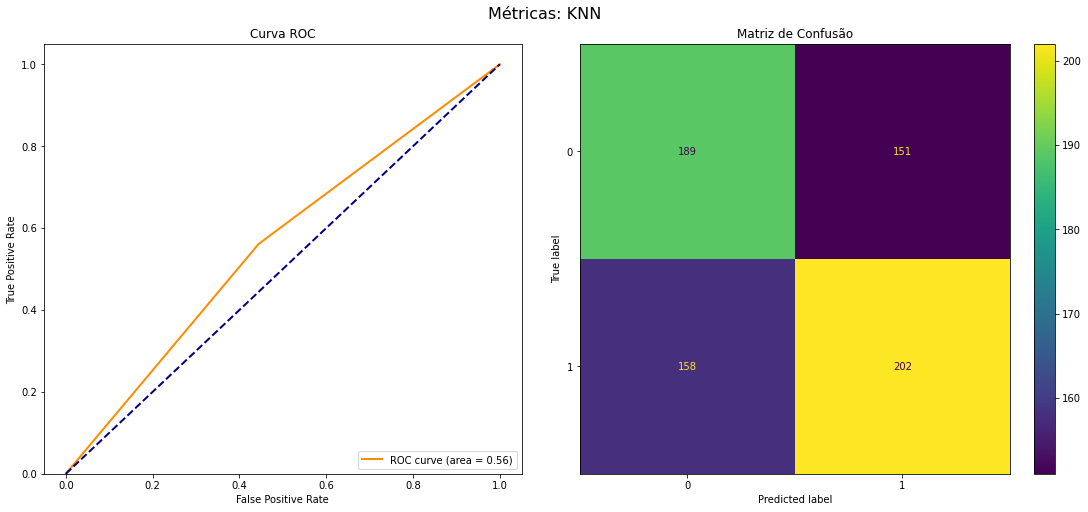

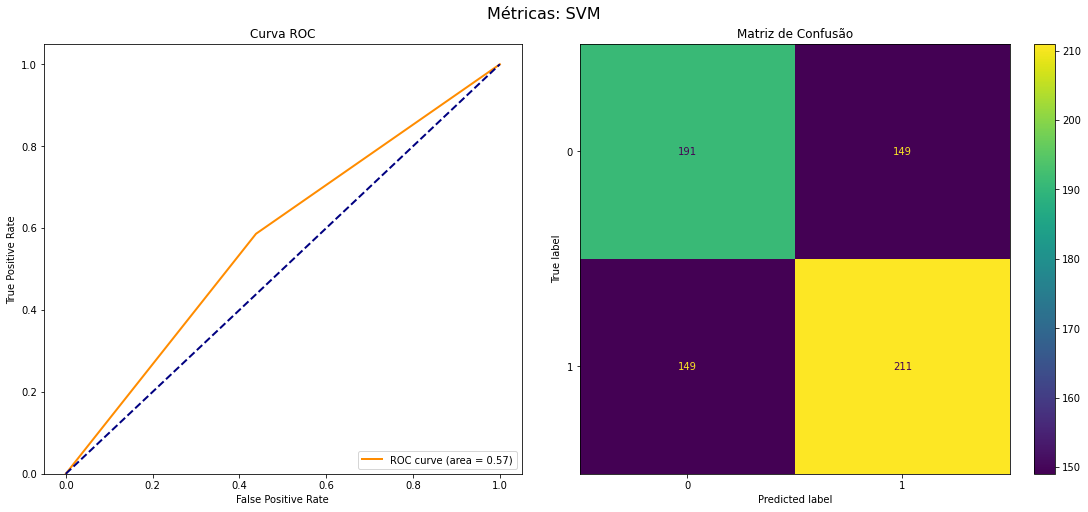

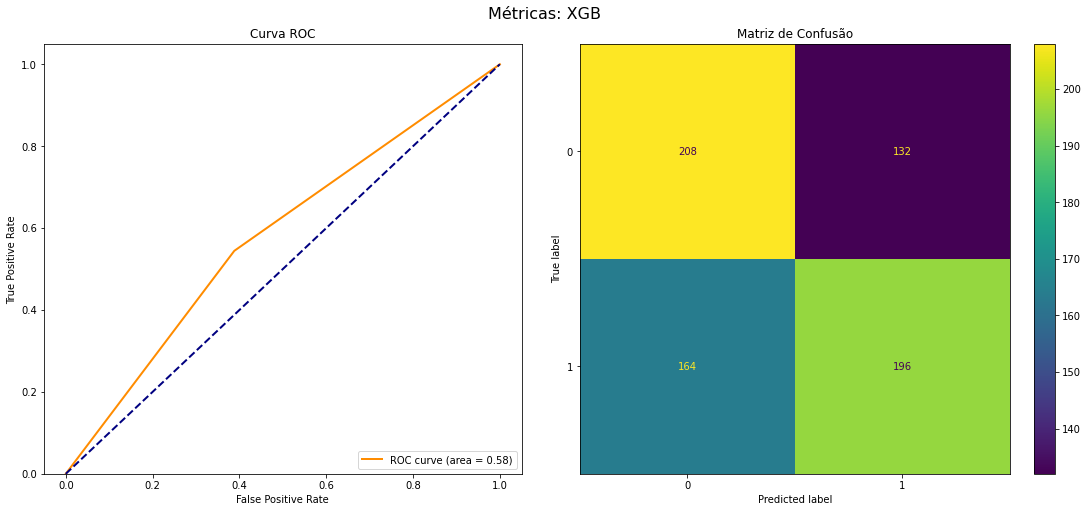

In [6]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_1_mat/'
ext = '*.mat'
x_mat,y_mat = load_eeg_data_mat(directory, ext)
nb_classes = np.unique(y_mat).shape[0]
_, channels, samples = np.shape(x_mat)
run_pipeline(x_mat, y_mat, "BCICIV_I", "all", metrics_results, fs=100, binary=True)

### 2. Training the subjects' data separately

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)
Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 

c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\plots.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15,7))


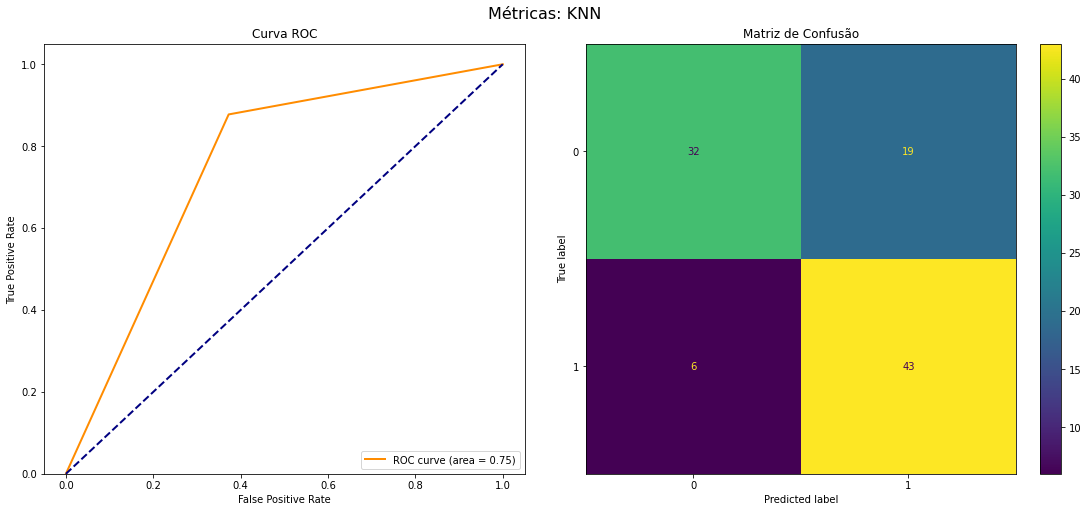

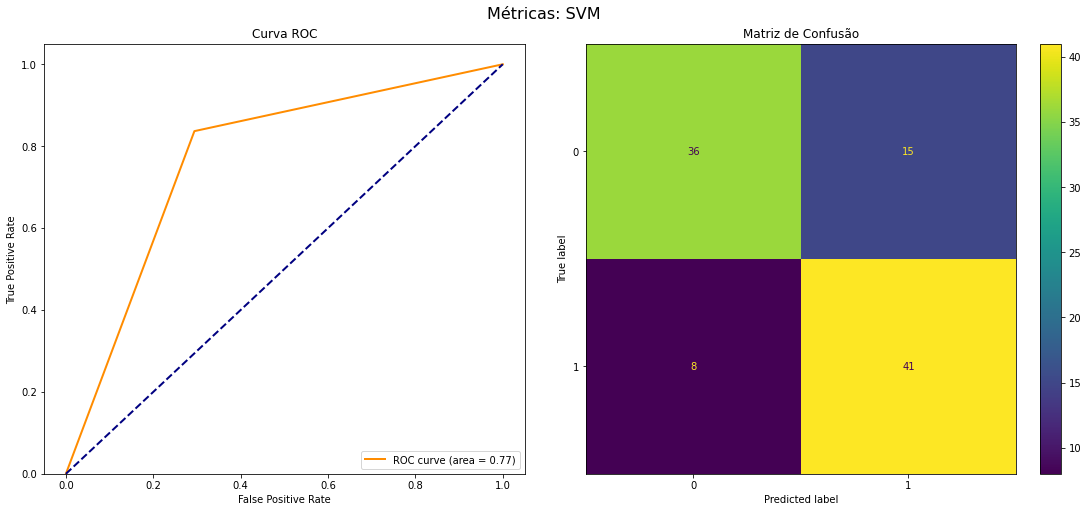

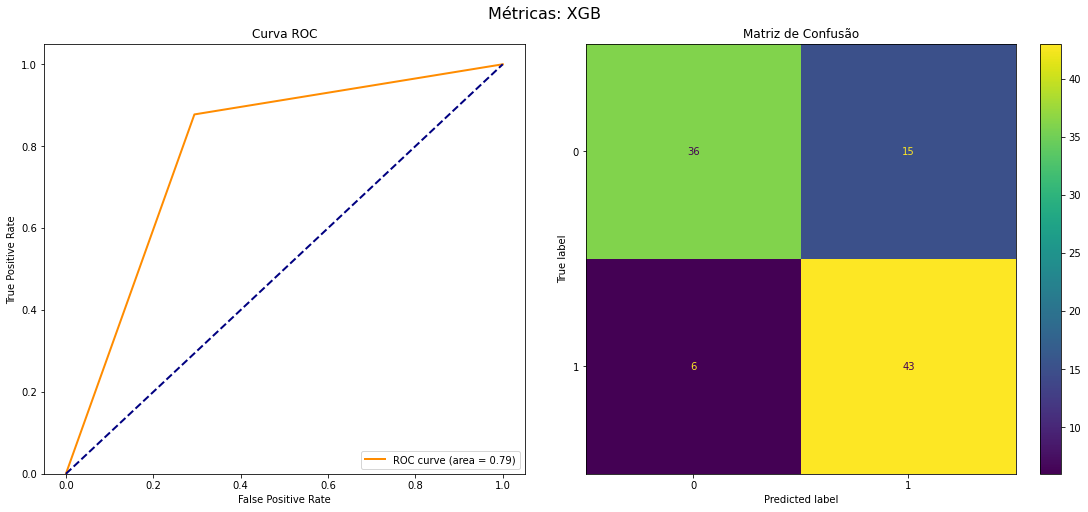

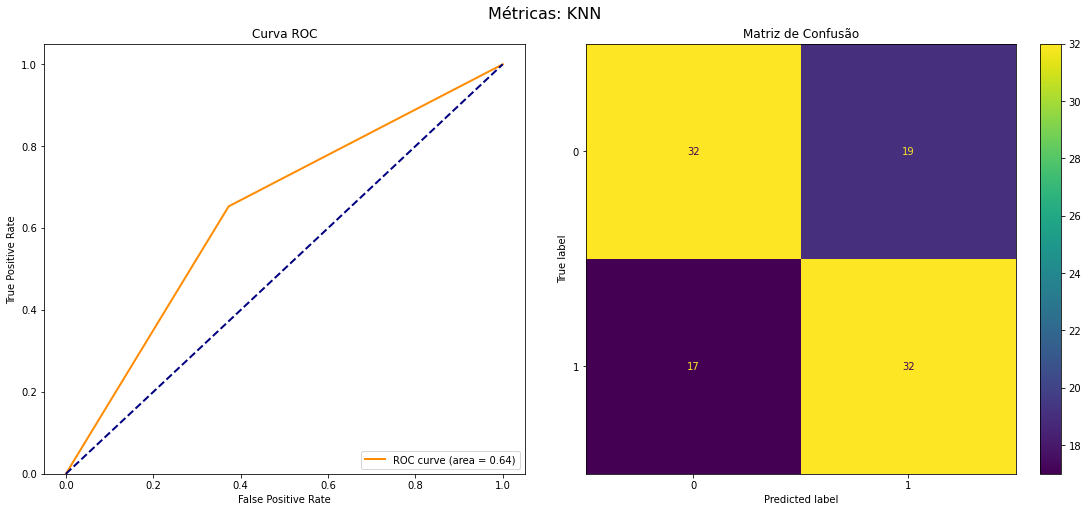

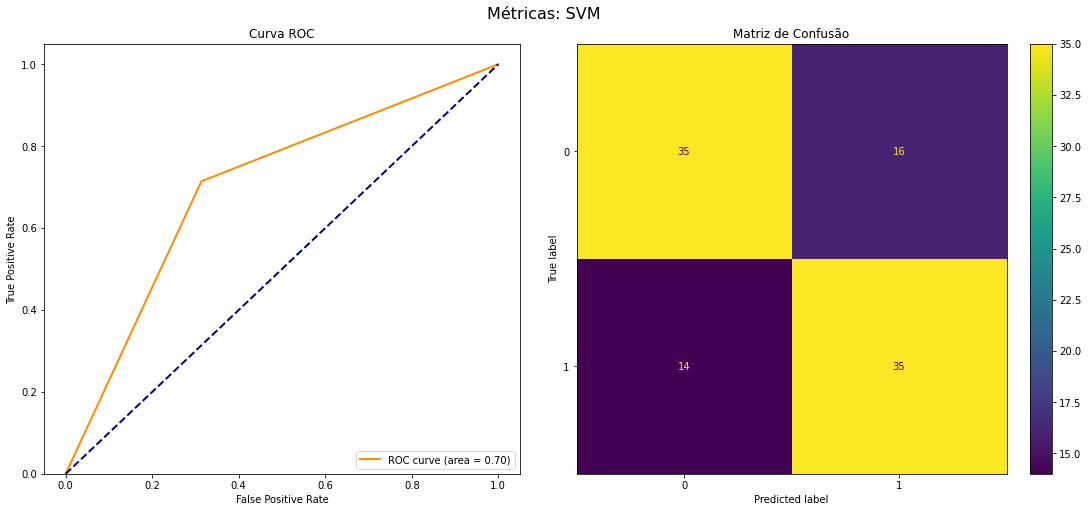

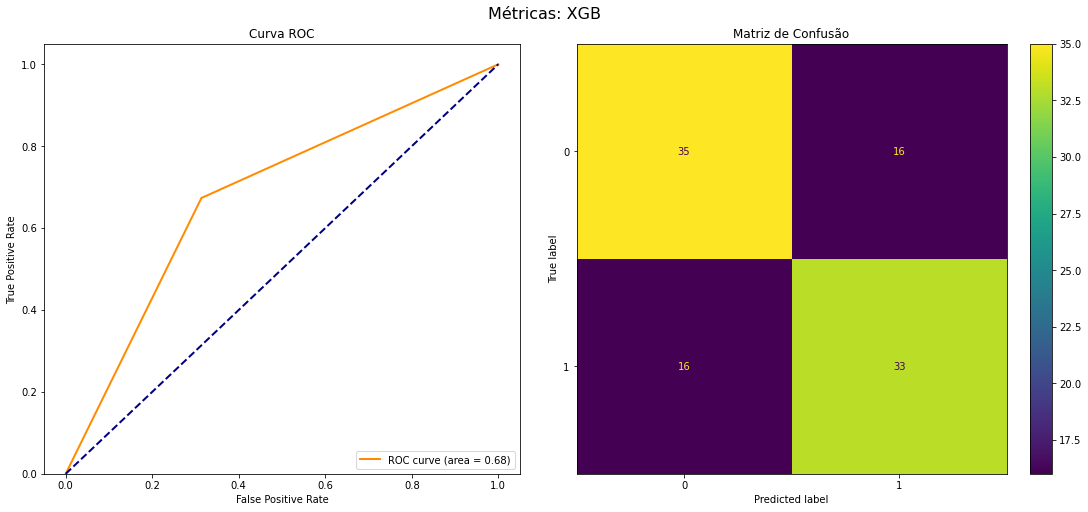

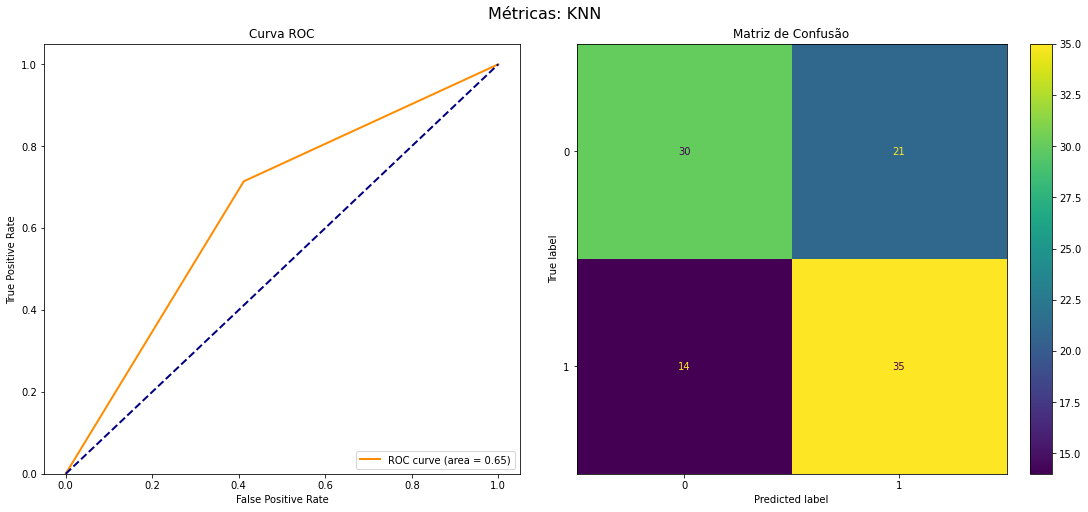

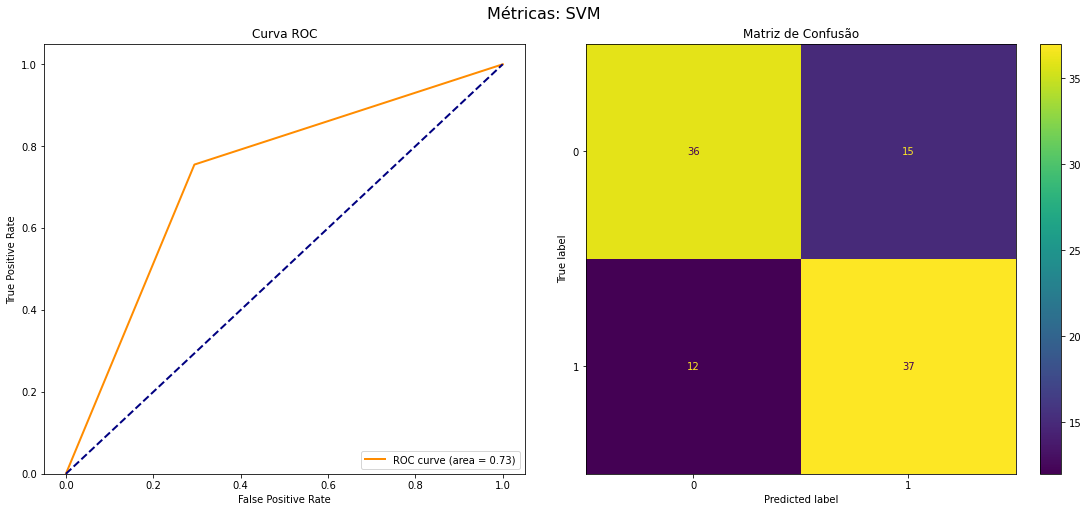

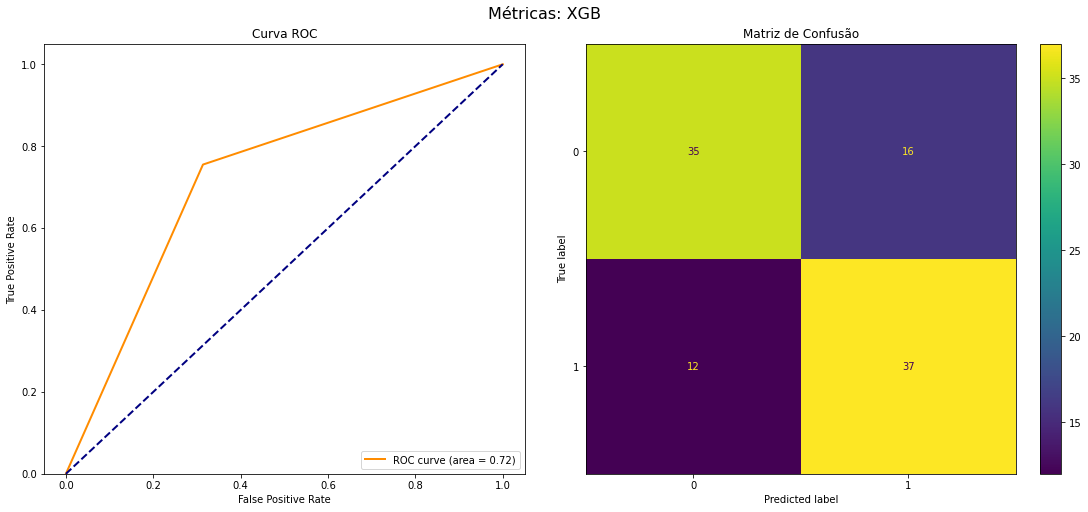

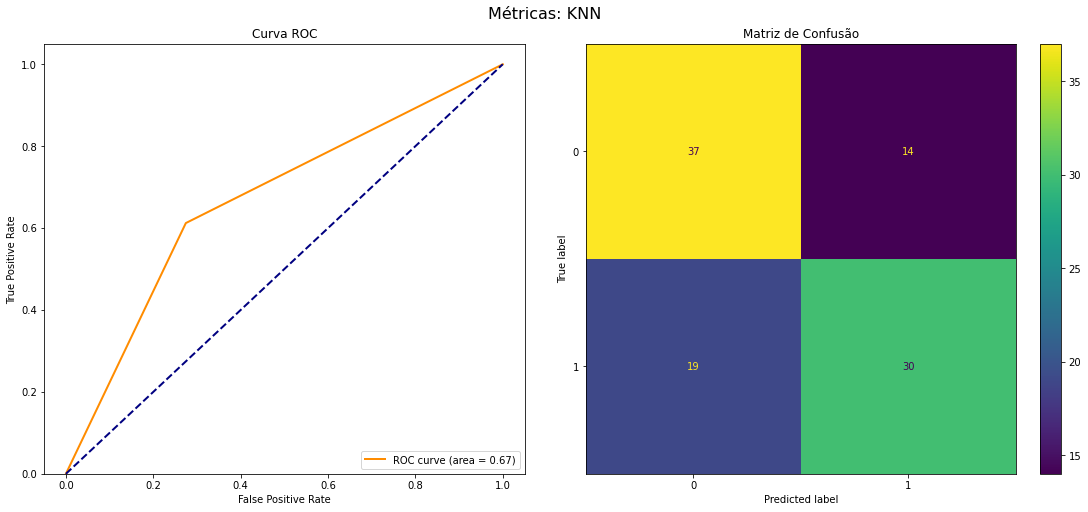

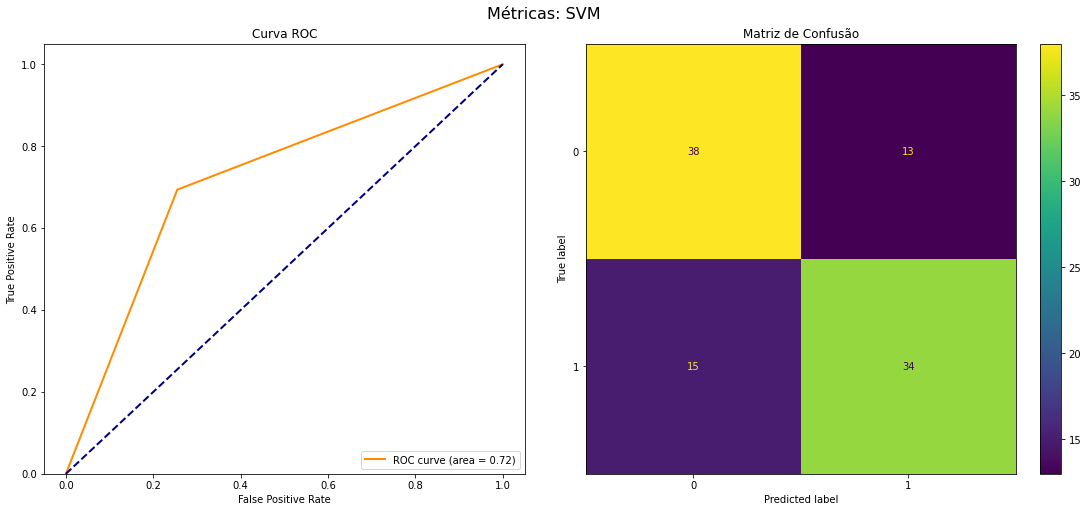

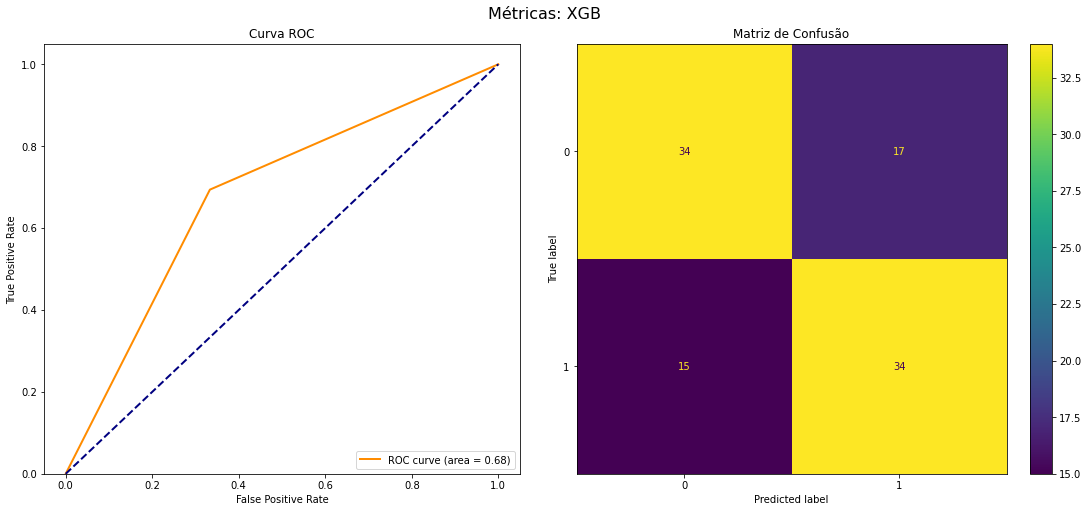

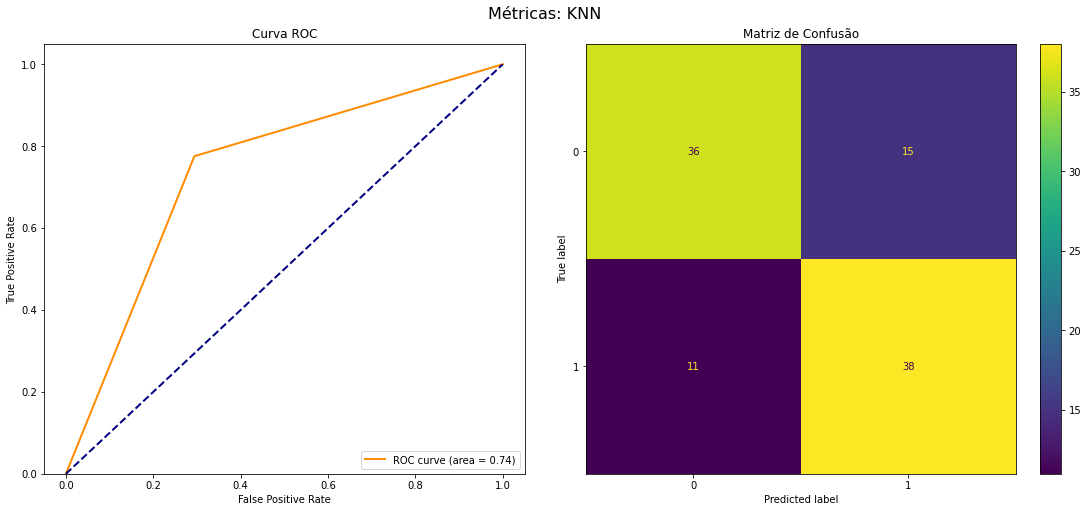

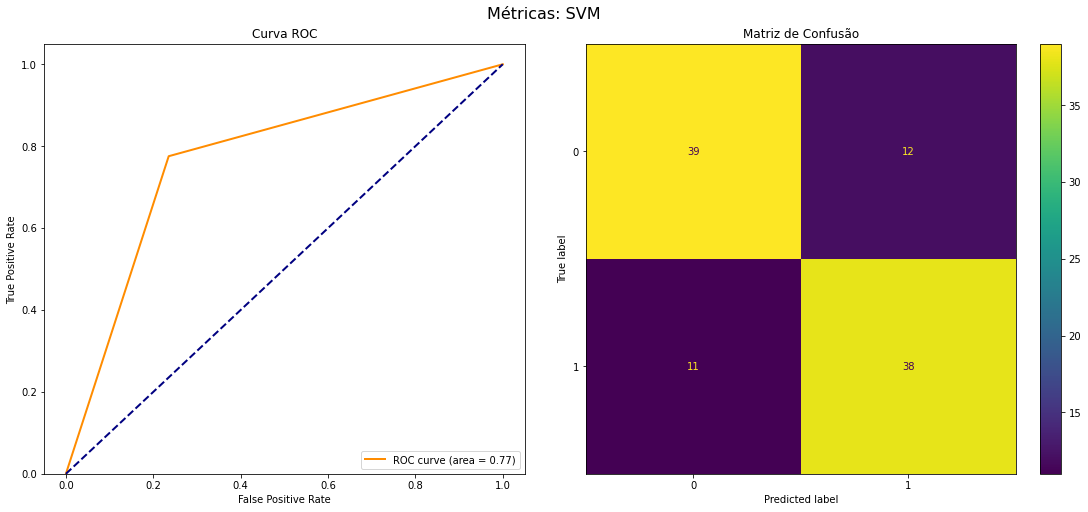

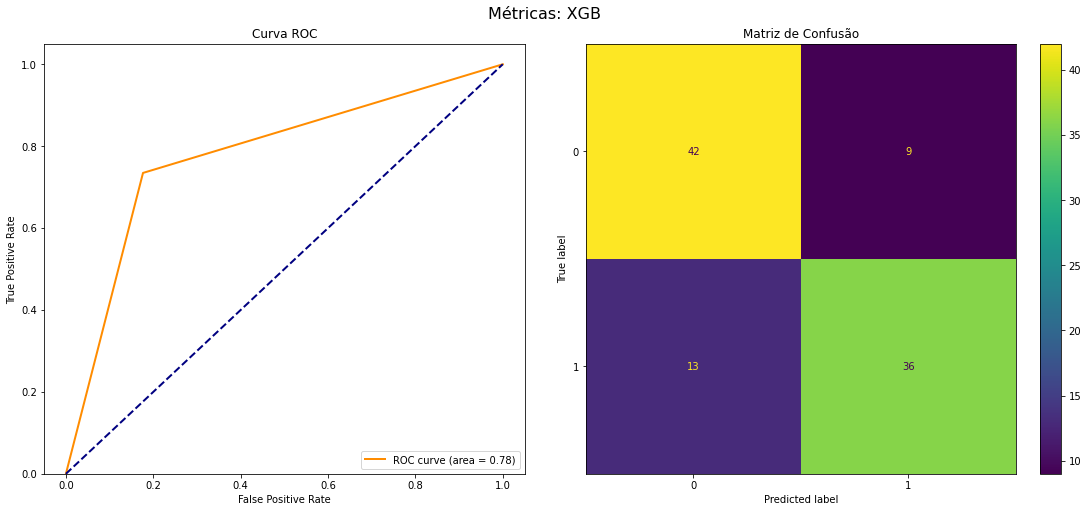

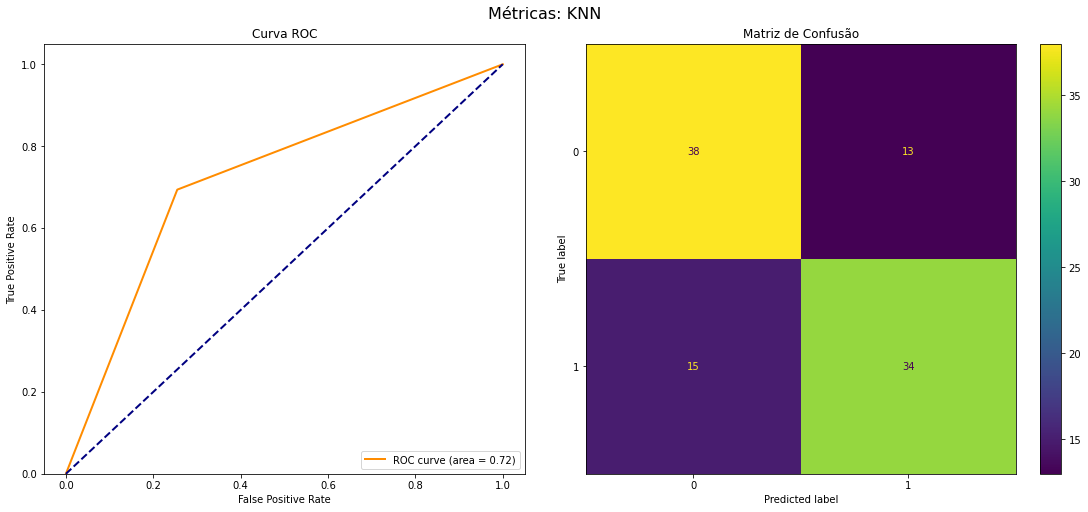

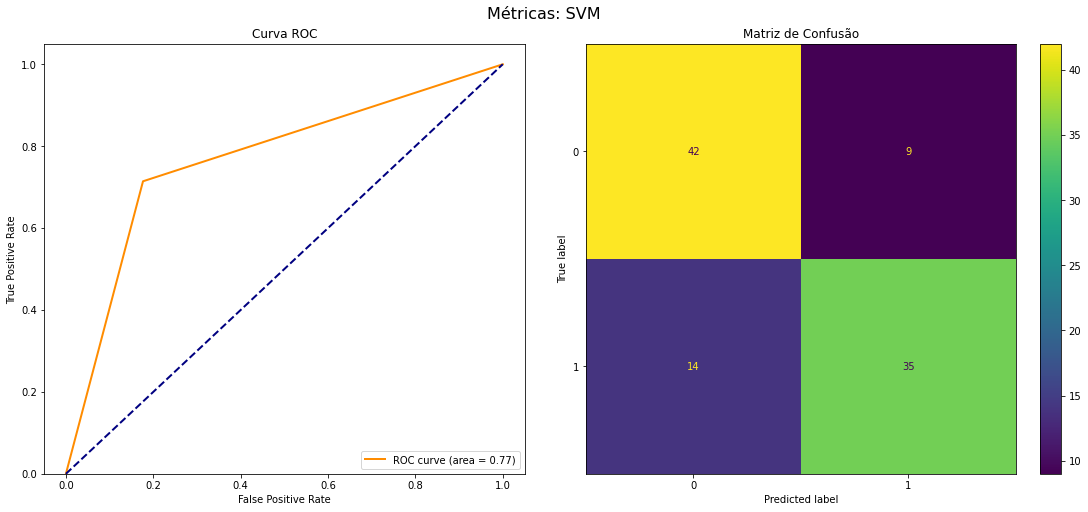

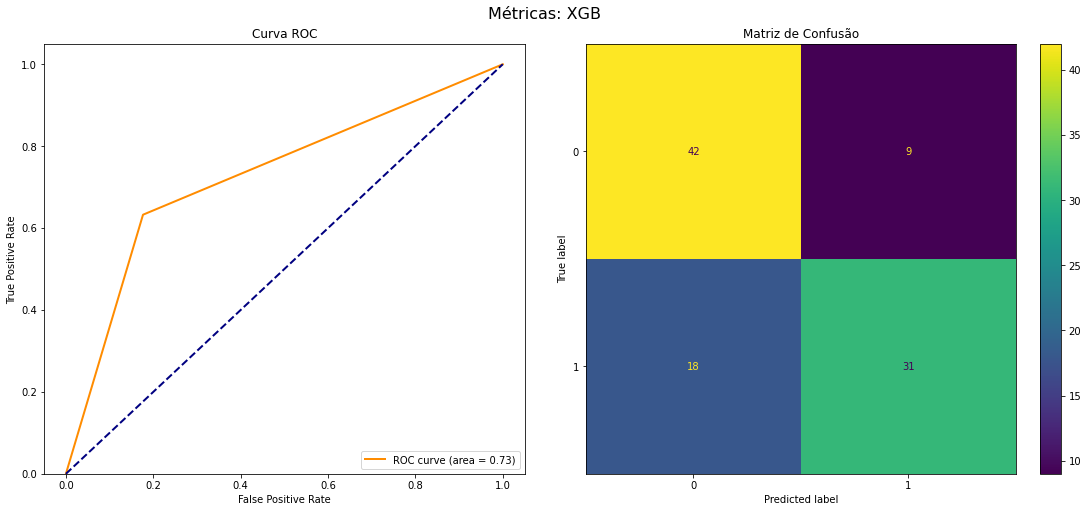

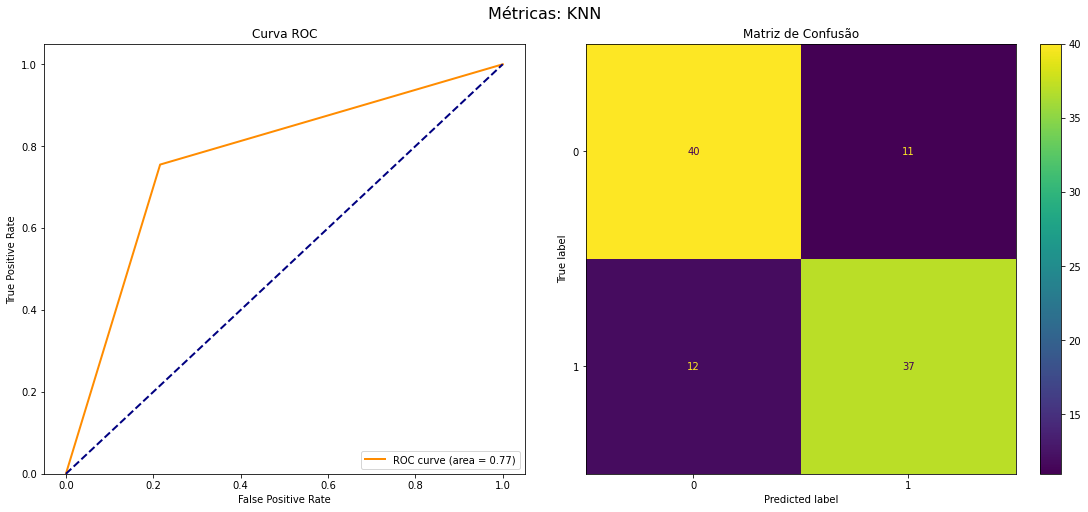

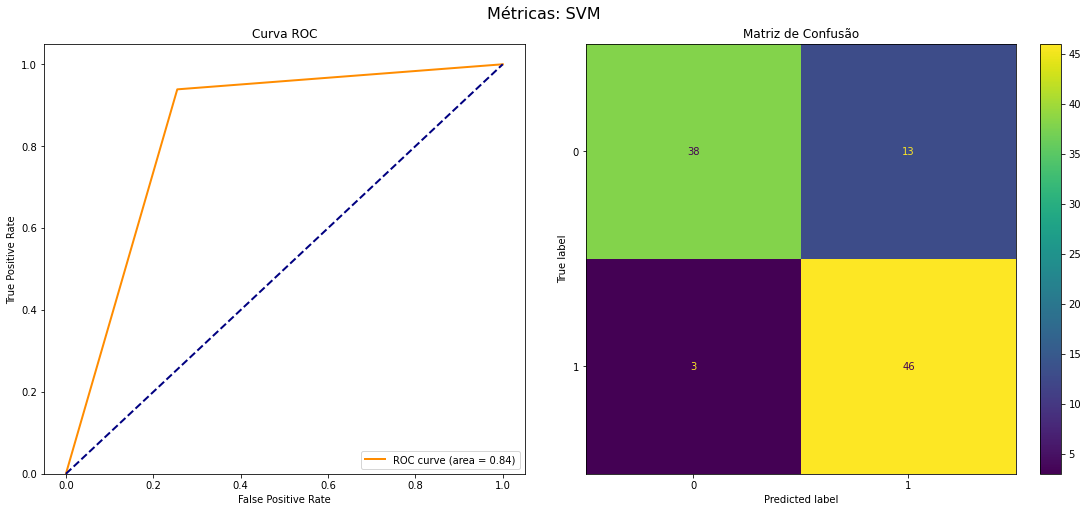

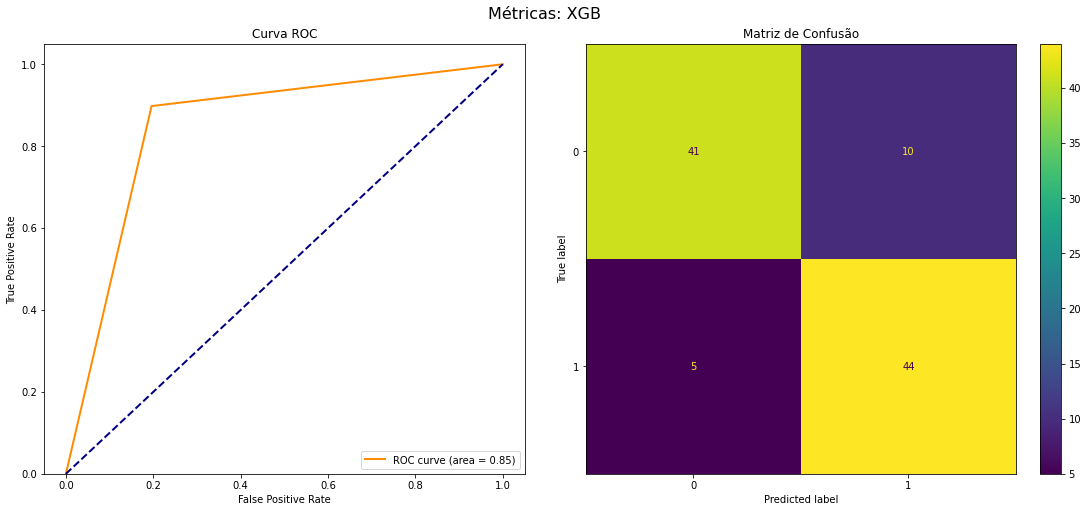

In [7]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_1_mat/'
files = [ file.stem for file in Path(directory).glob('*.mat')]
for file in files:
    extension = file + '.mat'
    x_mat,y_mat = load_eeg_data_mat(directory, extension)
    if  np.shape(x_mat)[0] == 0:
        continue
    
    nb_classes = np.unique(y_mat).shape[0]
    _, channels, samples = np.shape(x_mat)
    run_pipeline(x_mat, y_mat, "BCICIV_I", file, metrics_results, fs=100, binary=True)

## Dataset B

### 1. Training all subjects' data at once

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 201 original time poin

c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 9 (event id 9)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 10 (event id 10)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

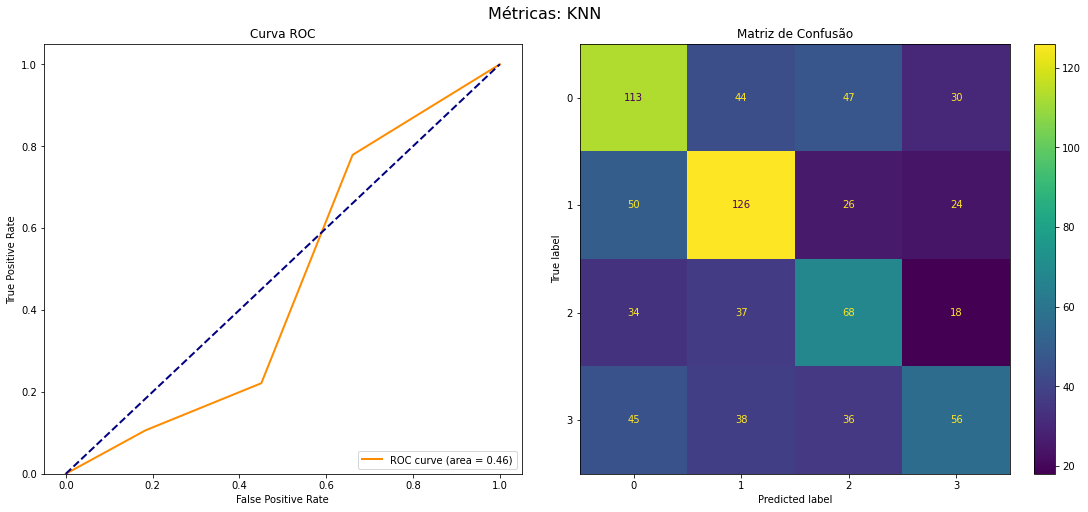

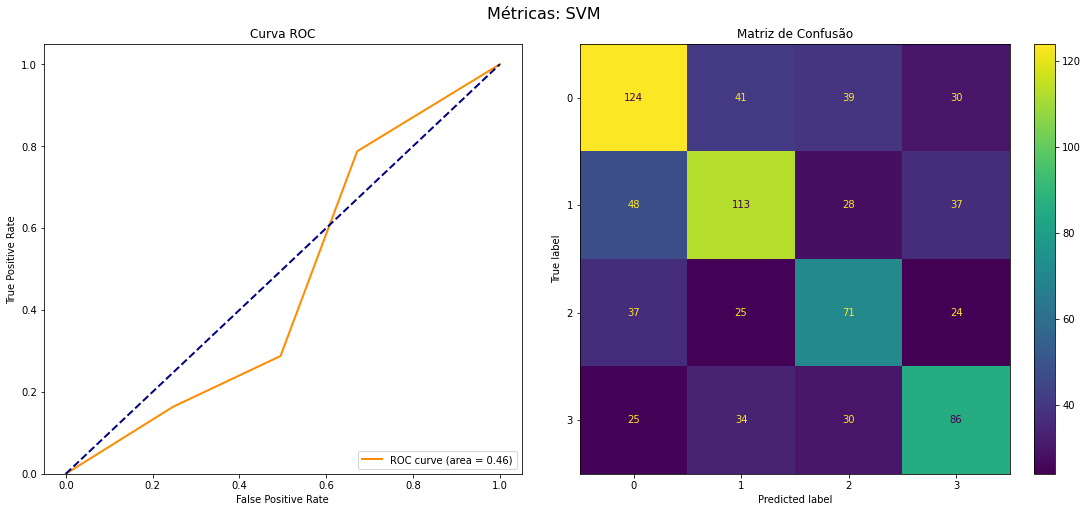

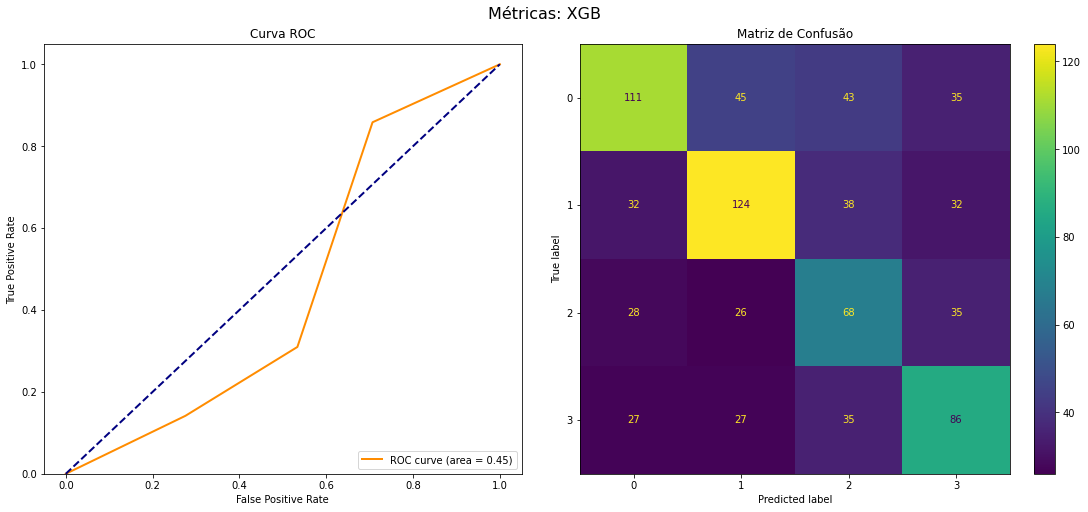

In [8]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_2a_gdf-dataset/' 
extension = '*T.gdf'


x_train_BCICIV, y_train_BCICIV = load_eeg_data_gdf(directory, extension)
nb_classes = np.unique(y_train_BCICIV).shape[0]
run_pipeline(x_train_BCICIV, y_train_BCICIV, "BCICIV_II", 'all', metrics_results, fs=250, binary=False)

### 2. Training the subjects' data separately

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 201 original time poin

c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 9 (event id 9)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 10 (event id 10)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

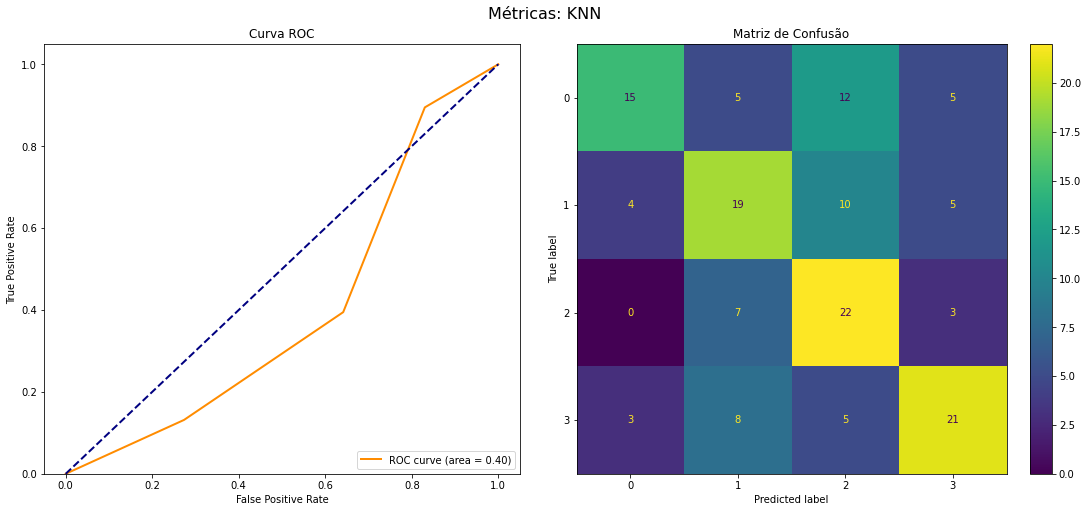

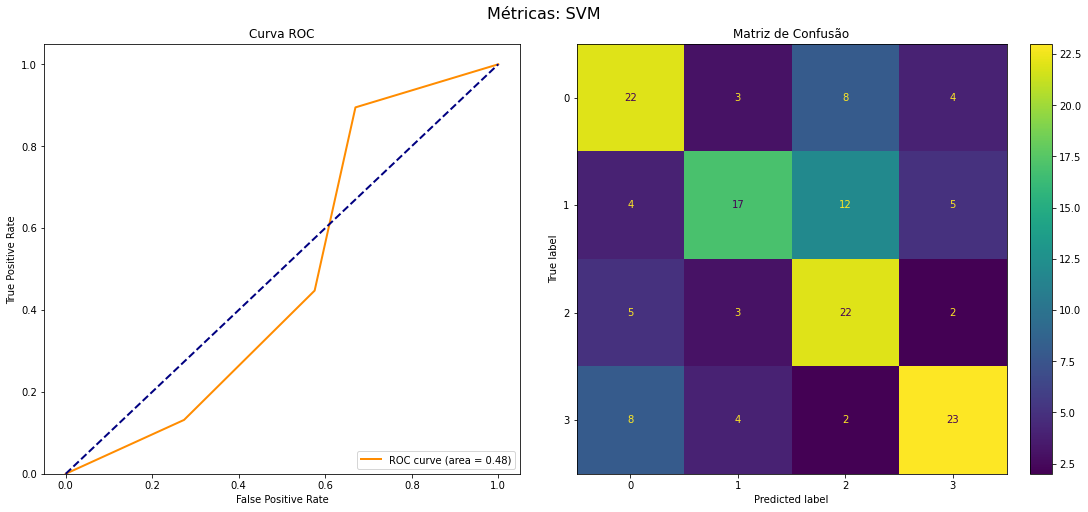

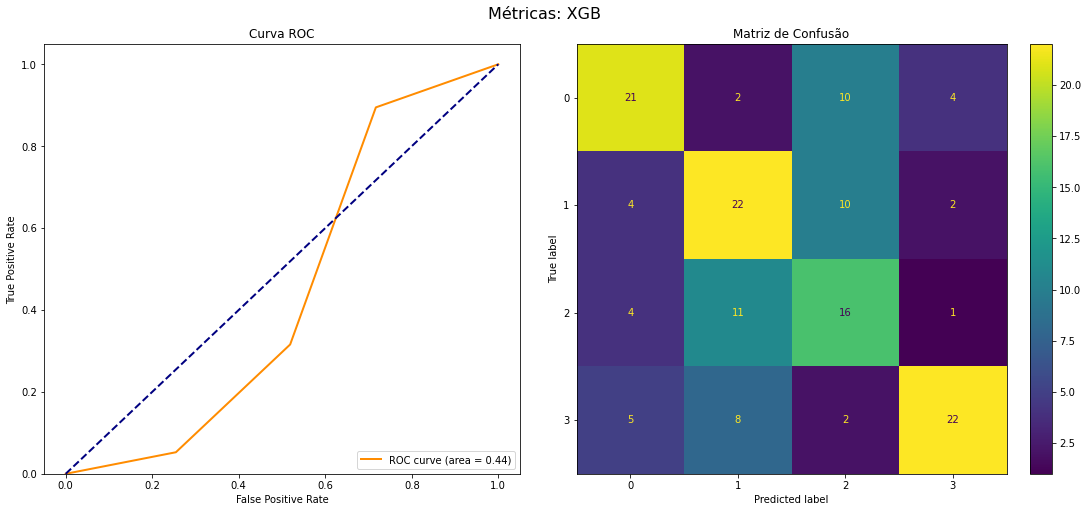

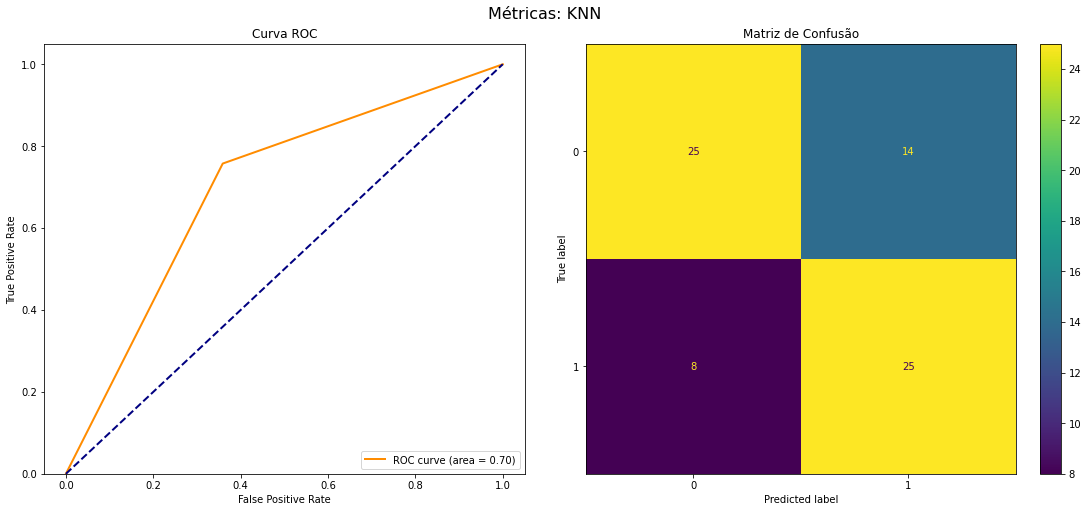

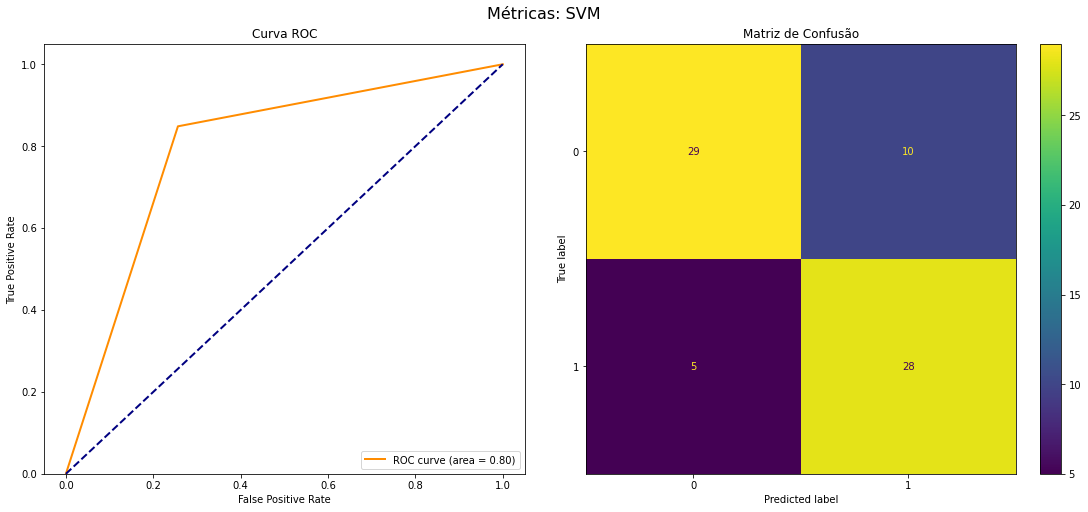

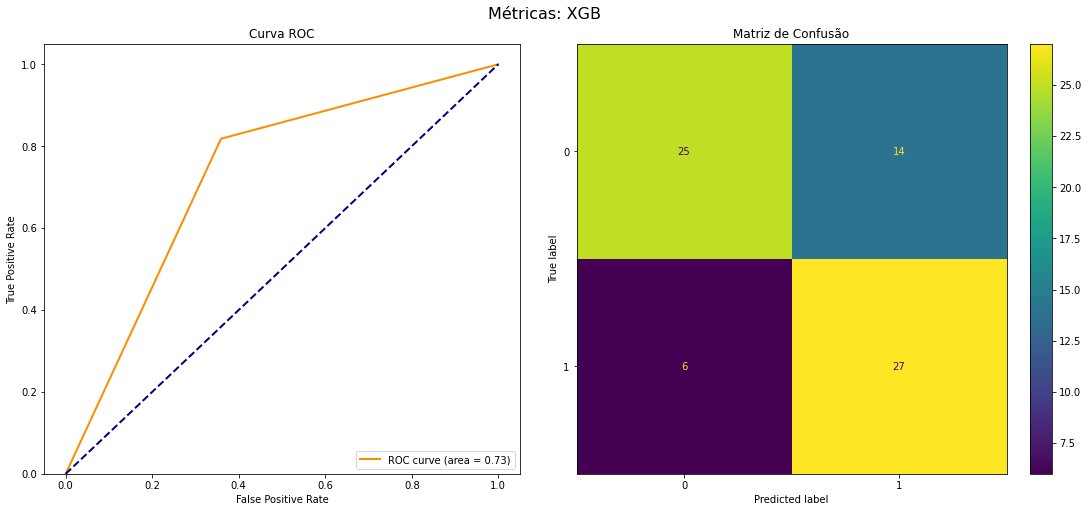

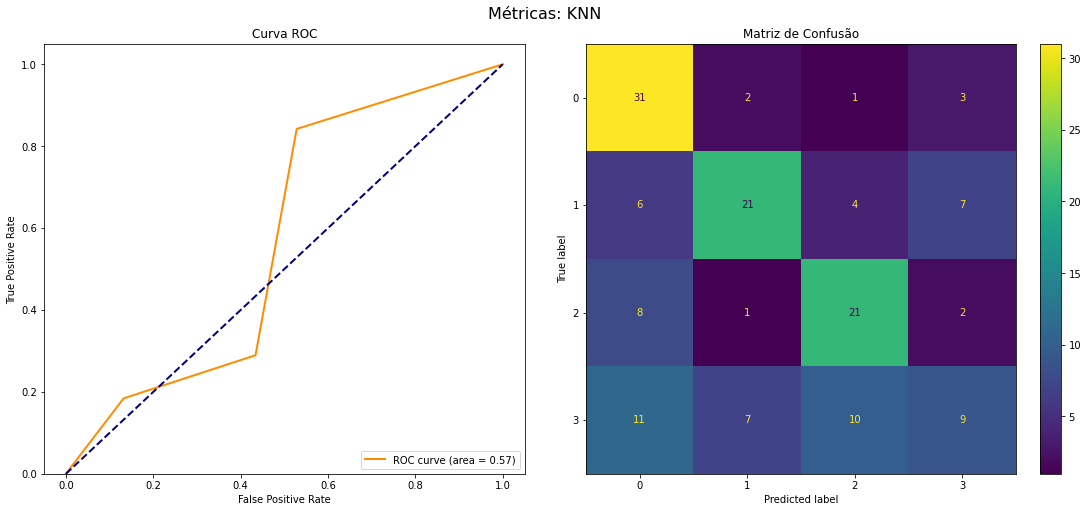

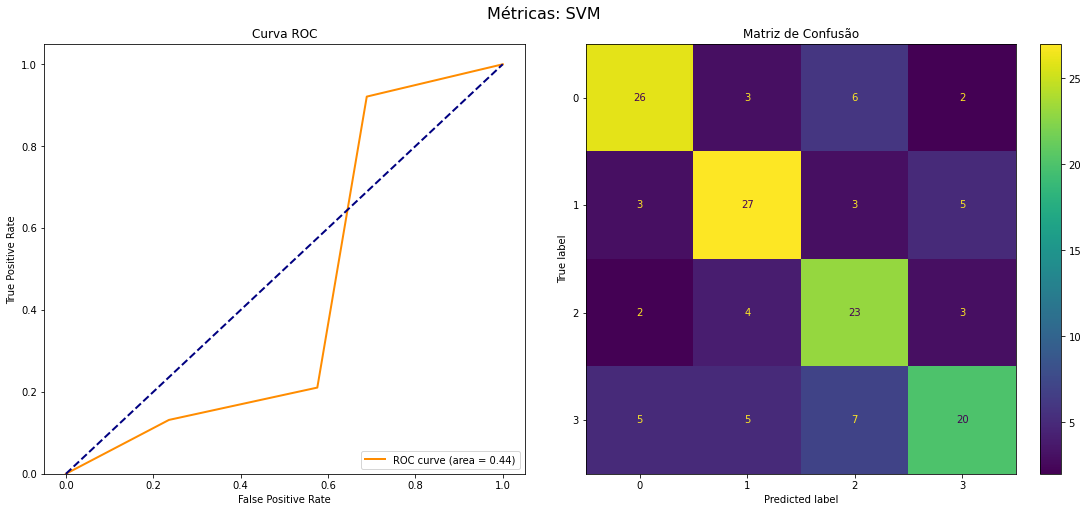

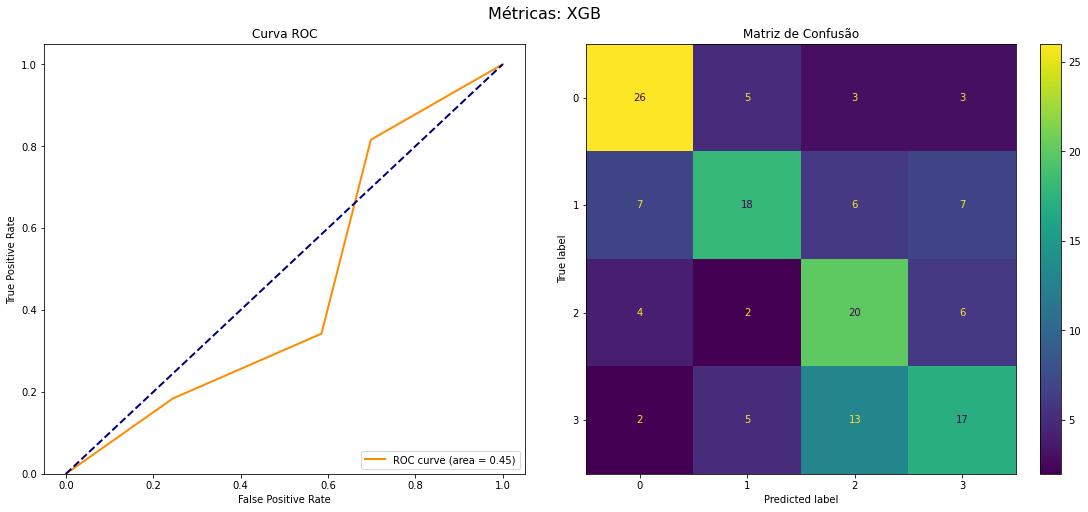

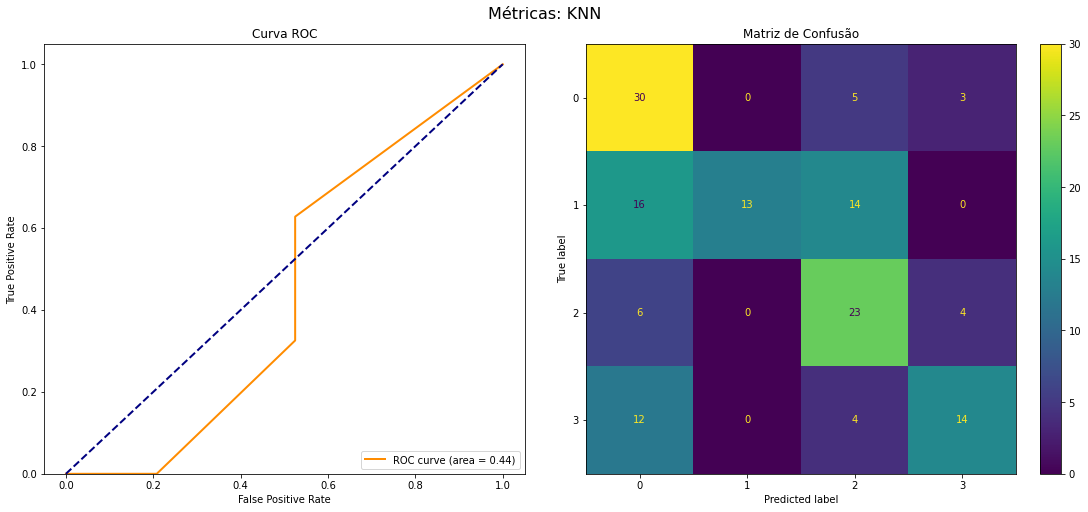

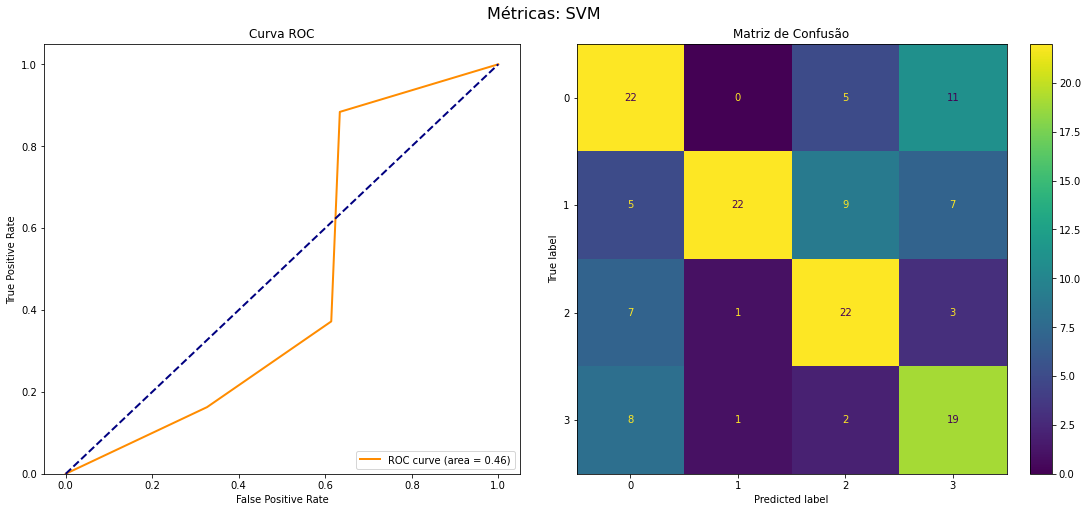

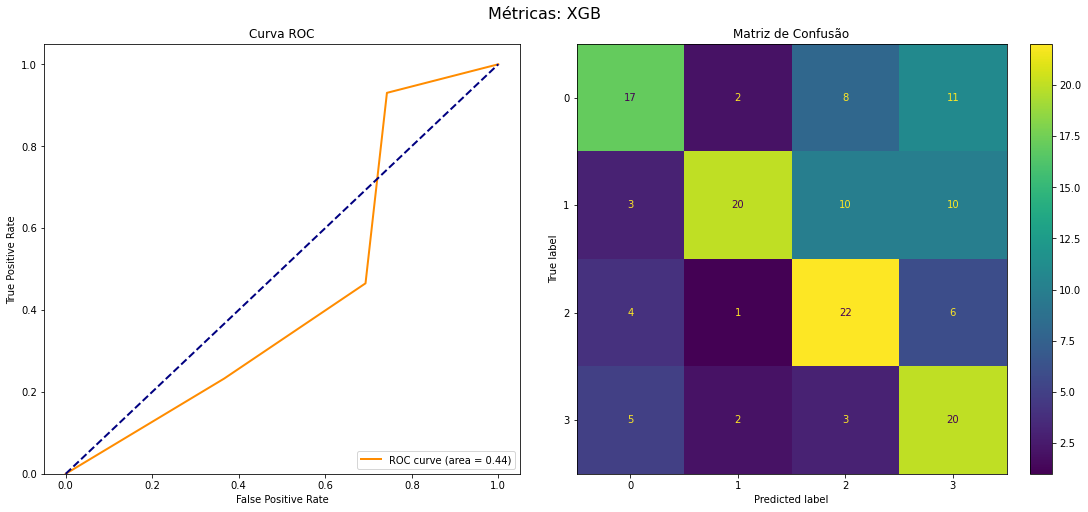

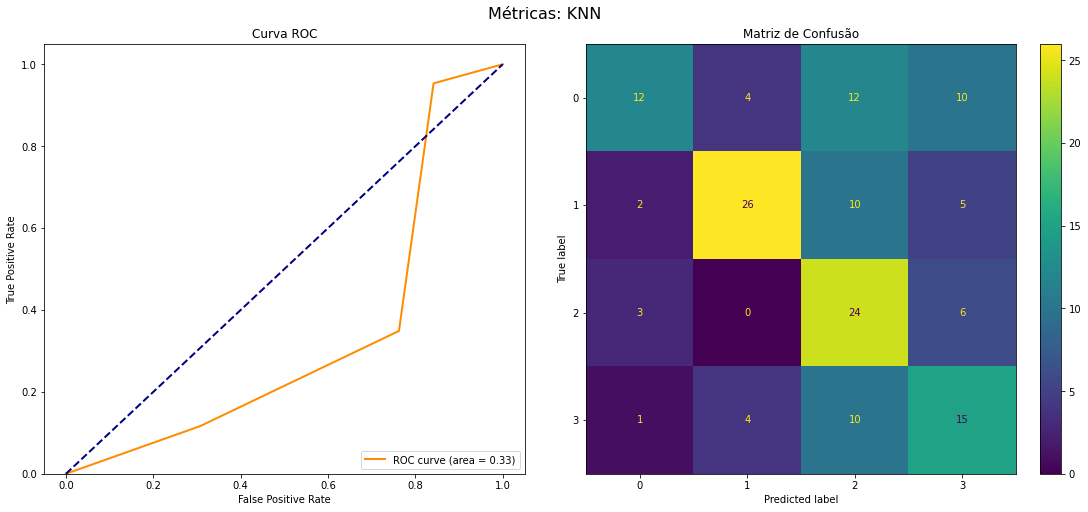

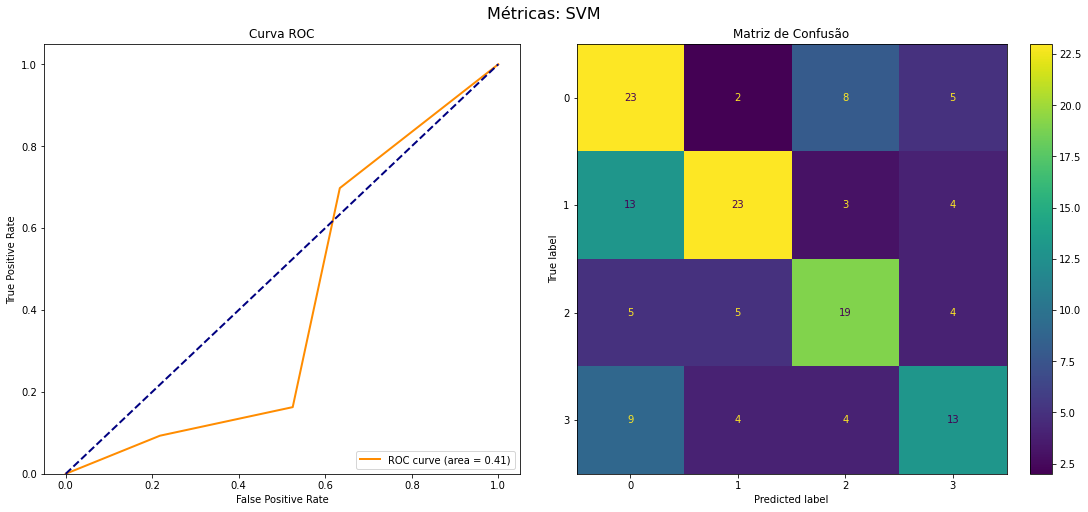

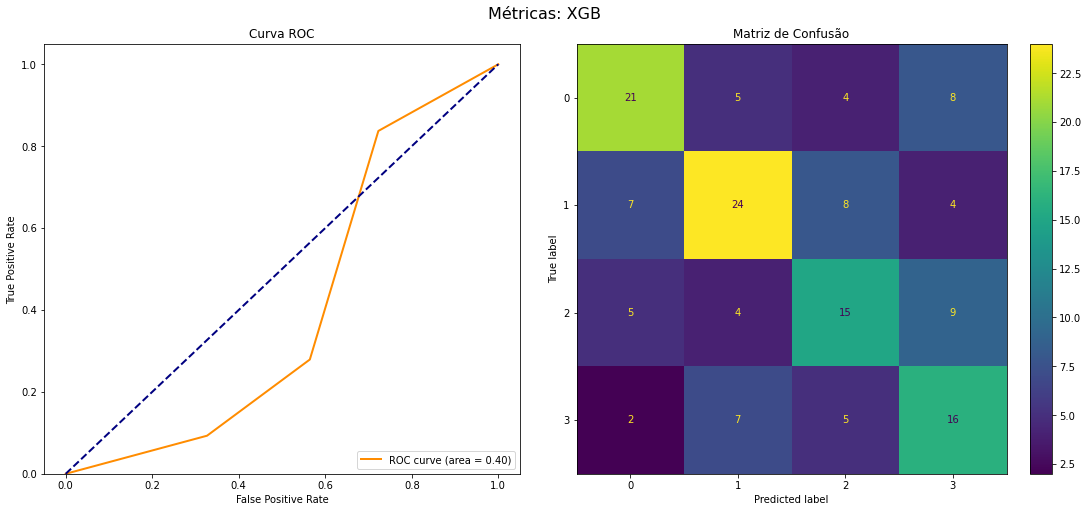

In [9]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_2a_gdf-dataset/'
files = [ file.stem for file in Path(directory).glob('*T.gdf')]
for file in files:
    extension = file + '.gdf'
    x_train_BCICIV, y_train_BCICIV = load_eeg_data_gdf(directory, extension)
    binary = len(np.unique(y_train_BCICIV)) == 2
    run_pipeline(x_train_BCICIV, y_train_BCICIV, "BCICIV_II", file, metrics_results, fs=250, binary=binary)

## Dataset C

### 1. Training all subjects' data at once

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

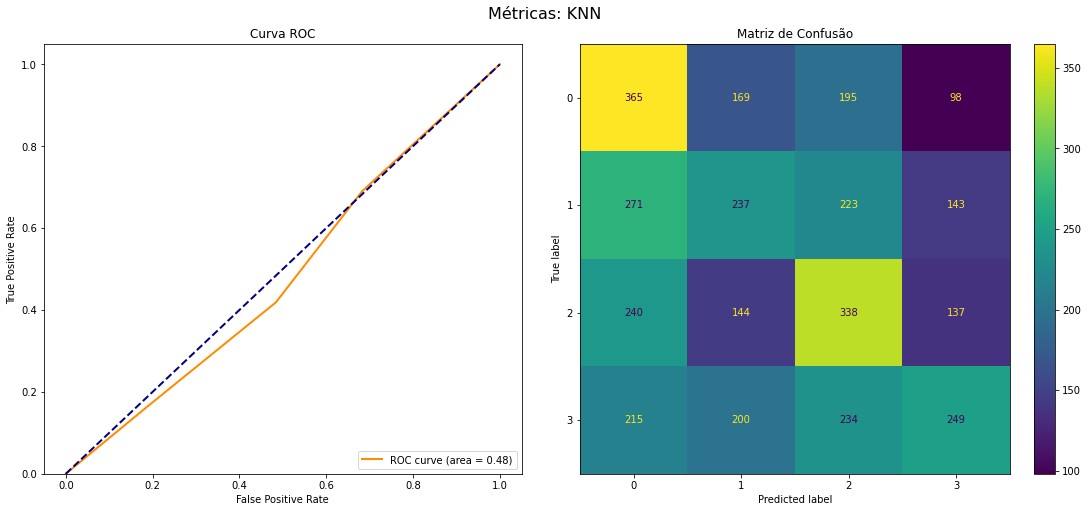

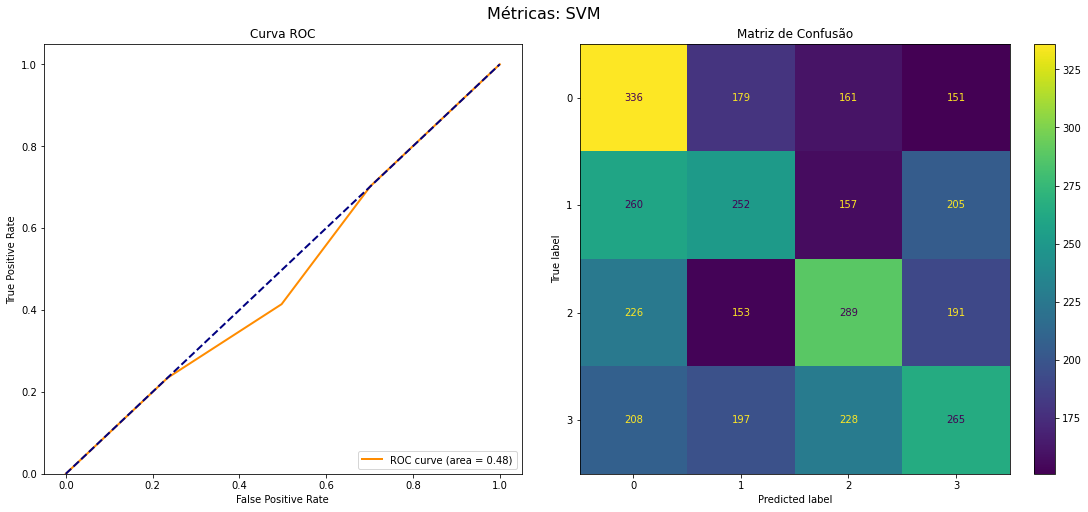

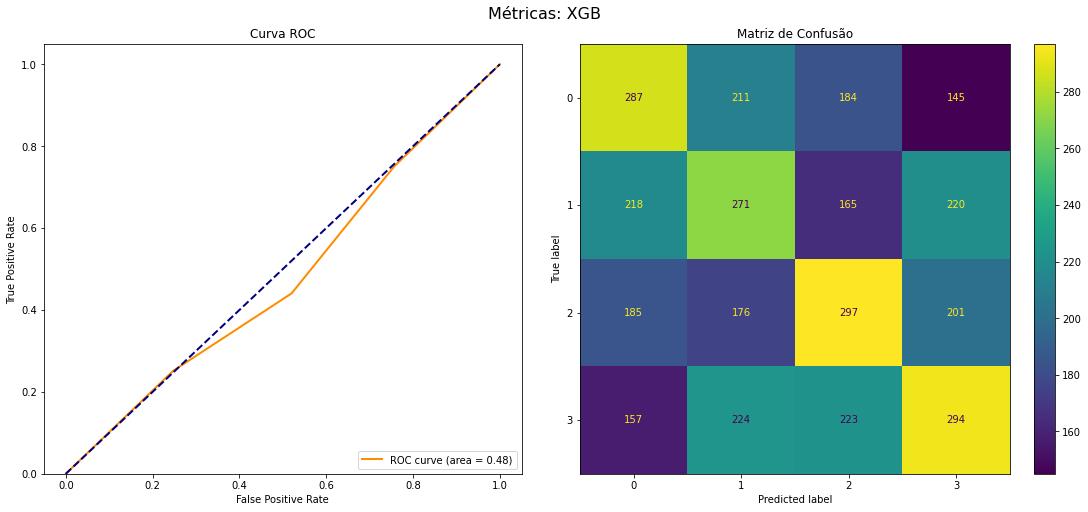

In [10]:
directory = 'C:/Users/Maods/Documents/TCC/data/eeg-motor-movementimagery-dataset/files/'
extension = '**/*.edf'

x_movementimagery, y_movementimagery  = load_eeg_data_edf(directory, extension)
run_pipeline(x_movementimagery, y_movementimagery, "eeg-mi", 'all', metrics_results, fs=160, binary=False)

### 2. Training the subjects' data separately

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\pyriemann\utils\base.py:14: RuntimeWarning: invalid value encountered in sqrt
  eigvals = np.diag(operator(eigvals))
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\pyriemann\utils\base.py:80: RuntimeWarning: invalid value encountered in sqrt
  def isqrt(x): return 1. / np.sqrt(x)


EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S022\S022R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting met

c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\plots.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15,7))


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S028\S028R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S028\S028R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\pyriemann\utils\base.py:14: RuntimeWarning: invalid value encountered in sqrt
  eigvals = np.diag(operator(eigvals))
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\pyriemann\utils\base.py:80: RuntimeWarning: invalid value encountered in sqrt
  def isqrt(x): return 1. / np.sqrt(x)


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S034\S034R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S034\S034R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\pyriemann\utils\base.py:14: RuntimeWarning: invalid value encountered in sqrt
  eigvals = np.diag(operator(eigvals))
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\pyriemann\utils\base.py:80: RuntimeWarning: invalid value encountered in sqrt
  def isqrt(x): return 1. / np.sqrt(x)


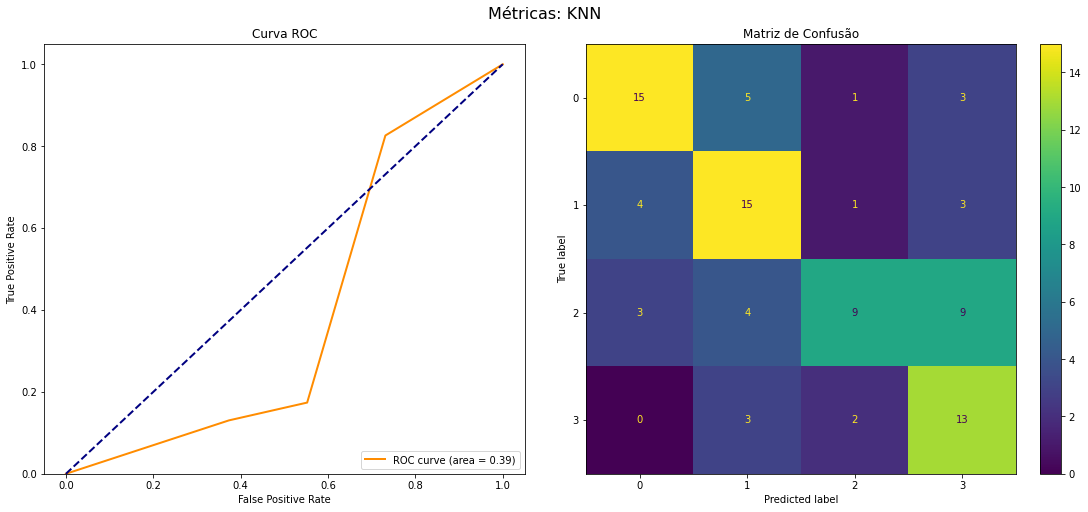

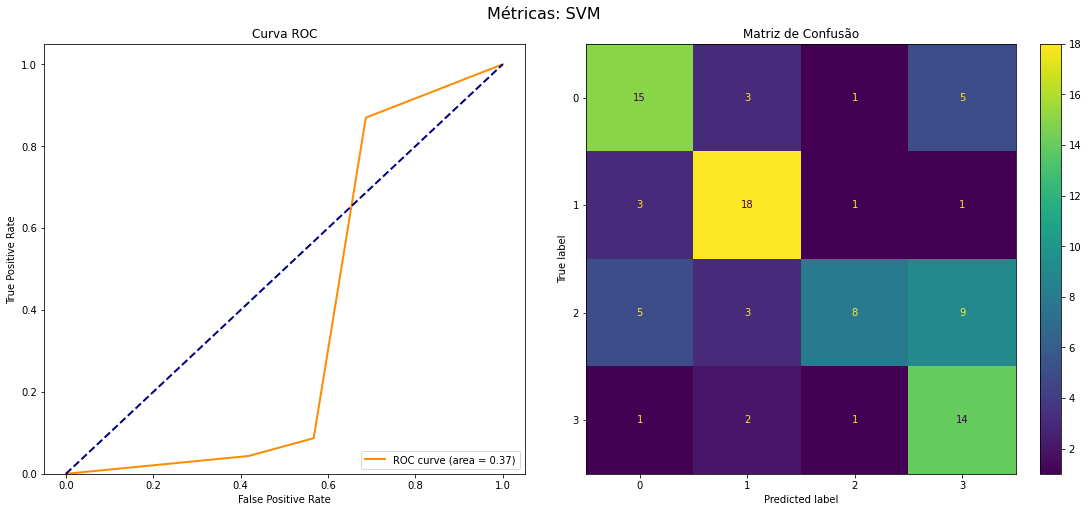

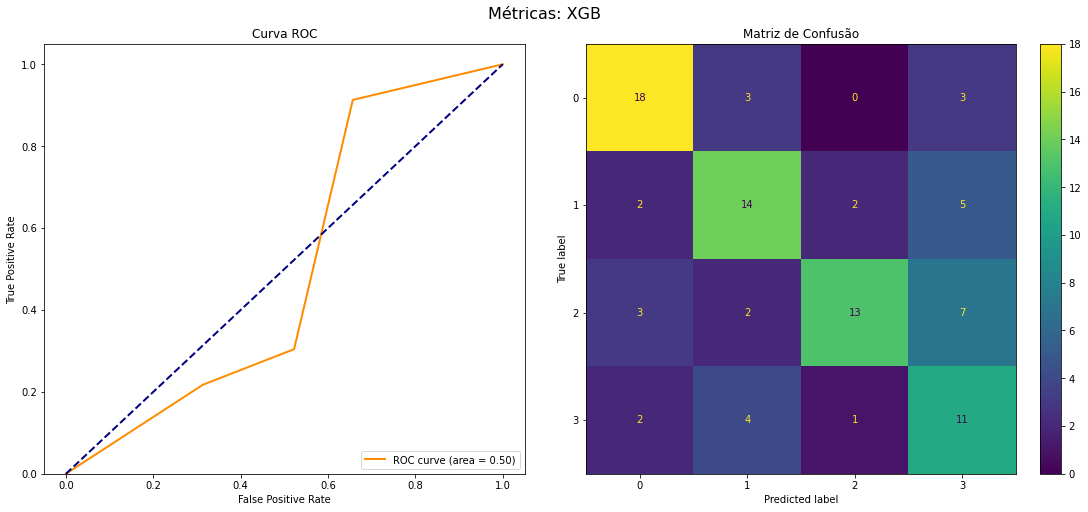

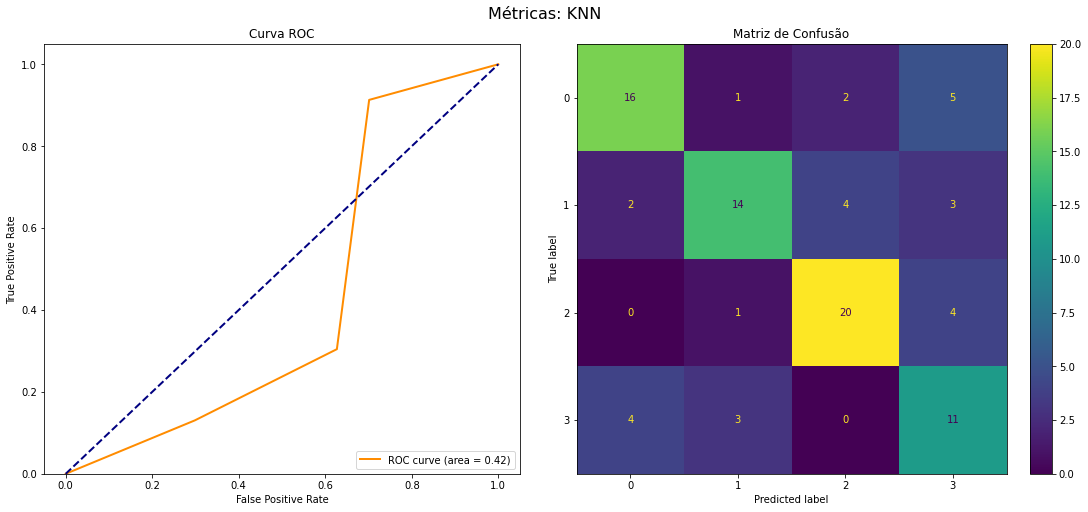

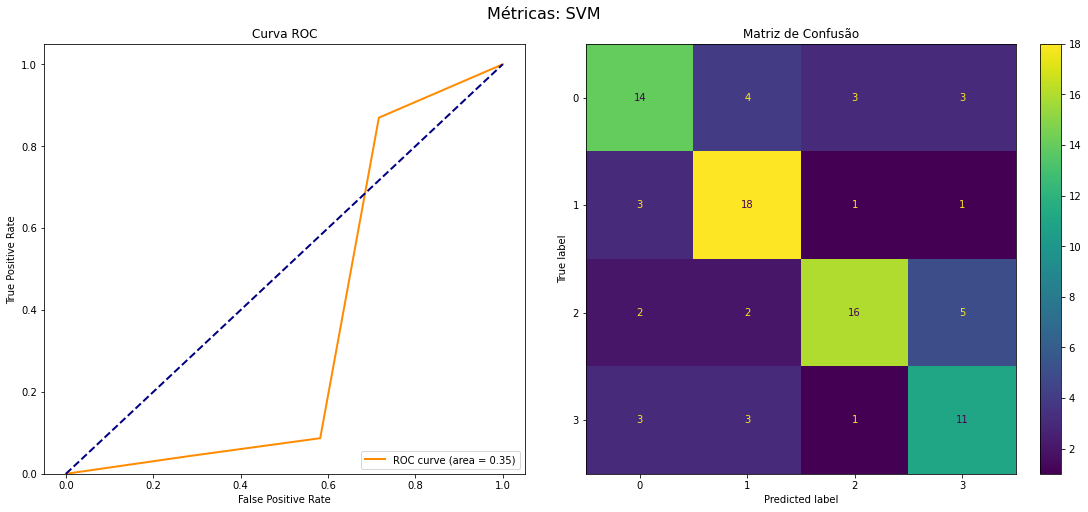

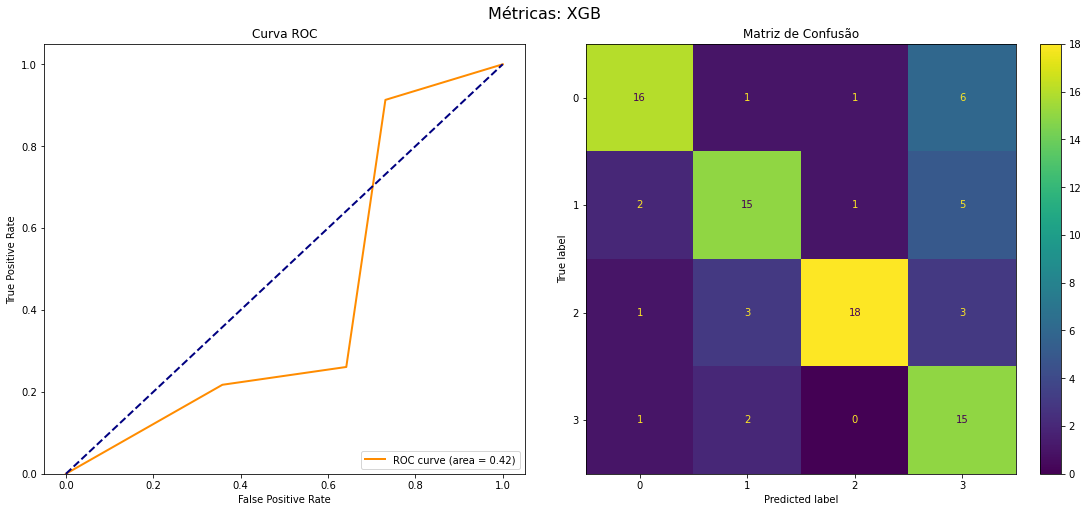

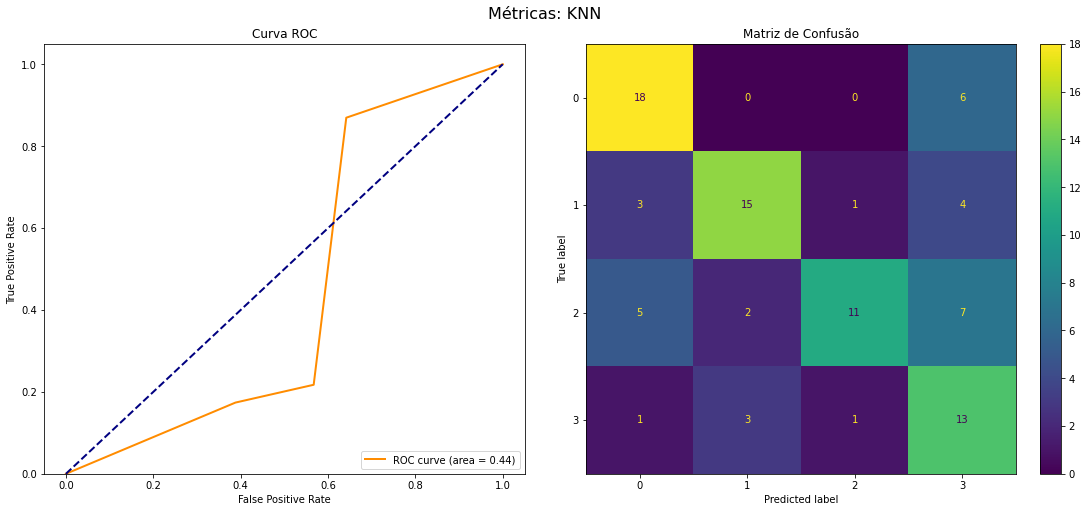

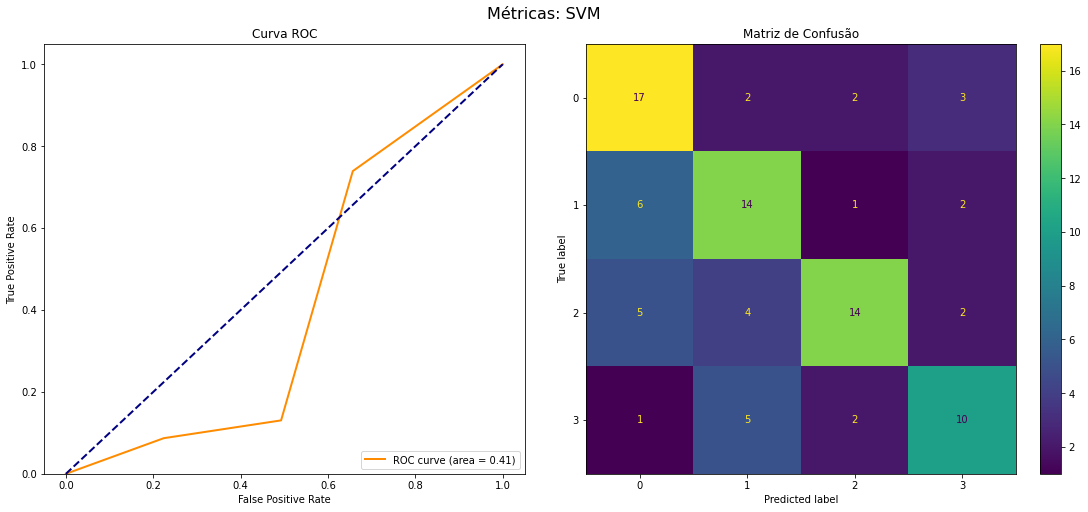

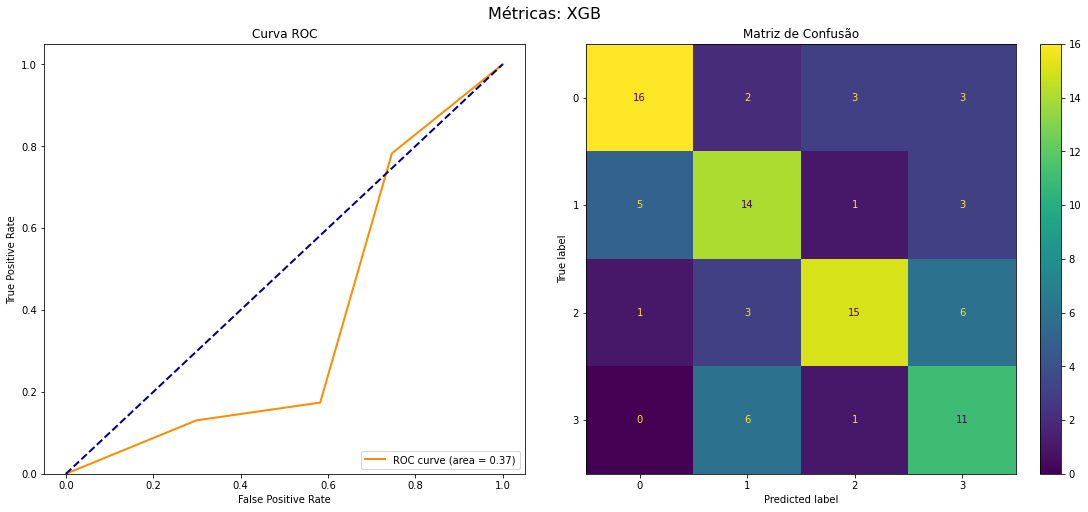

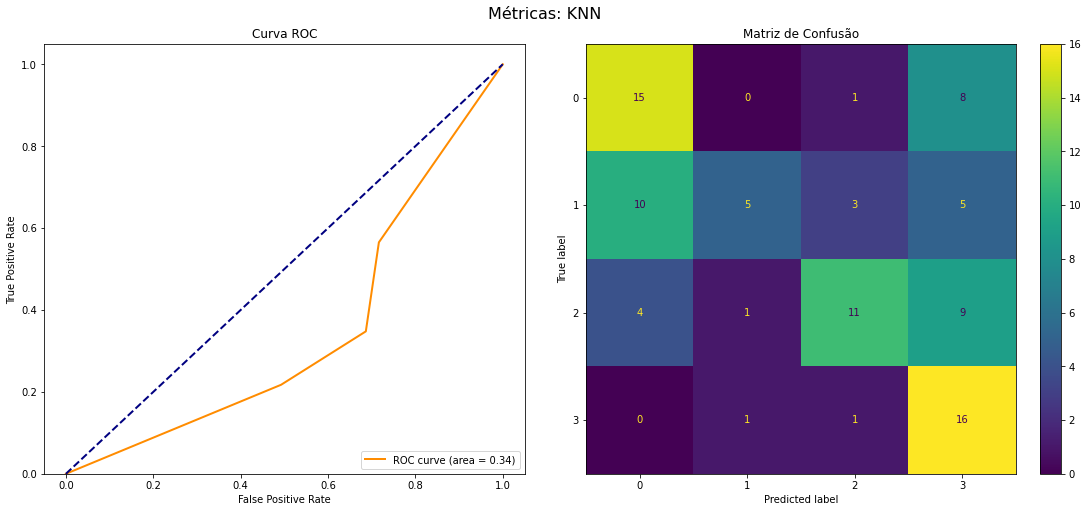

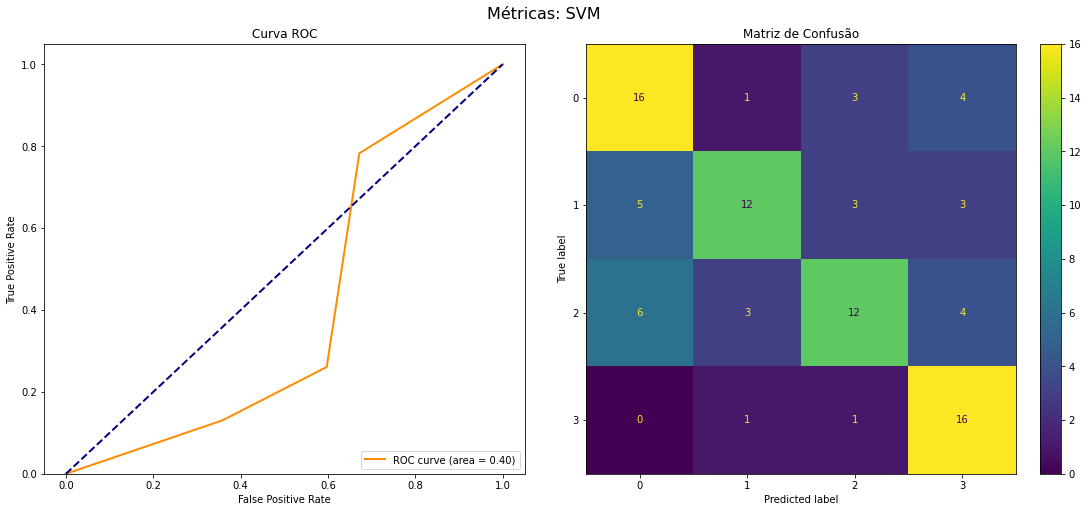

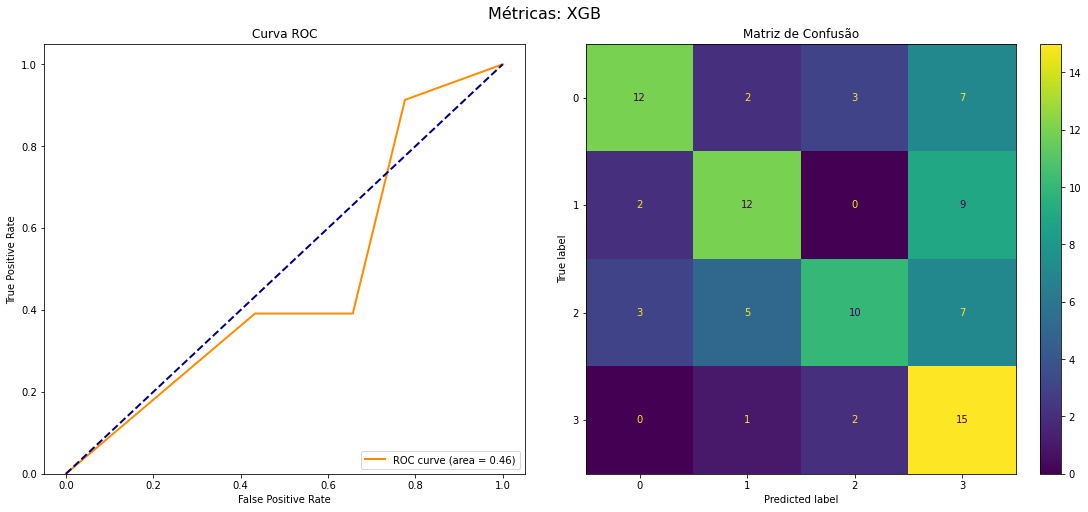

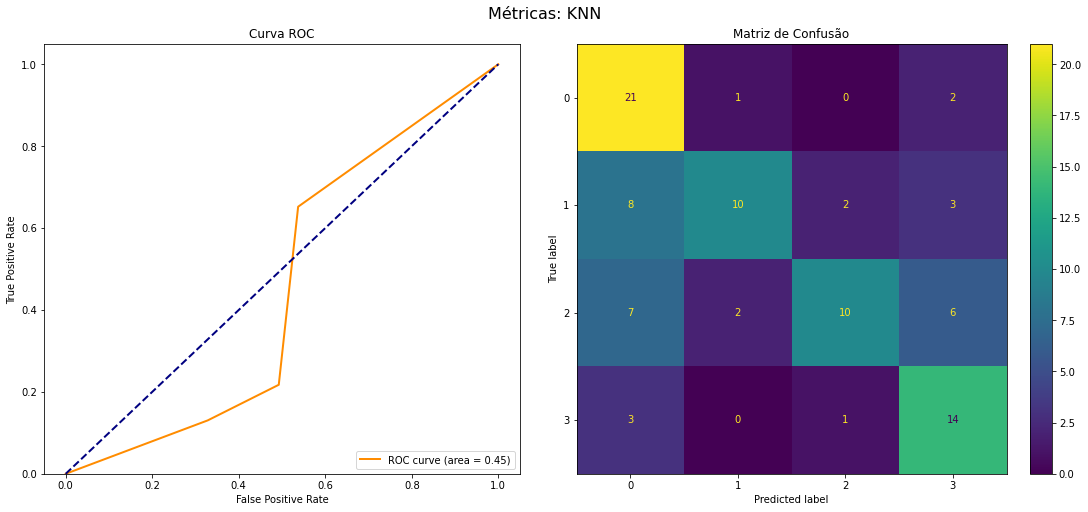

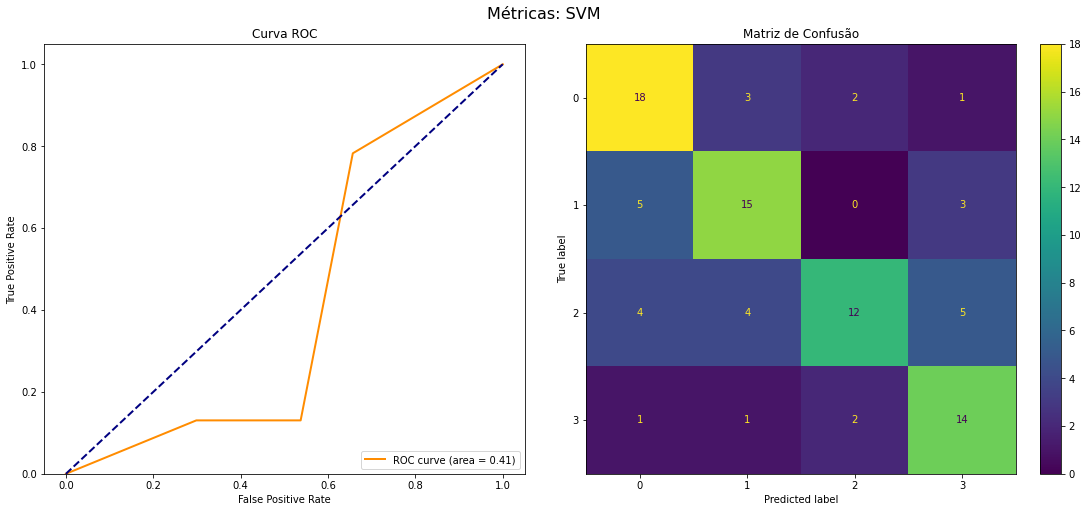

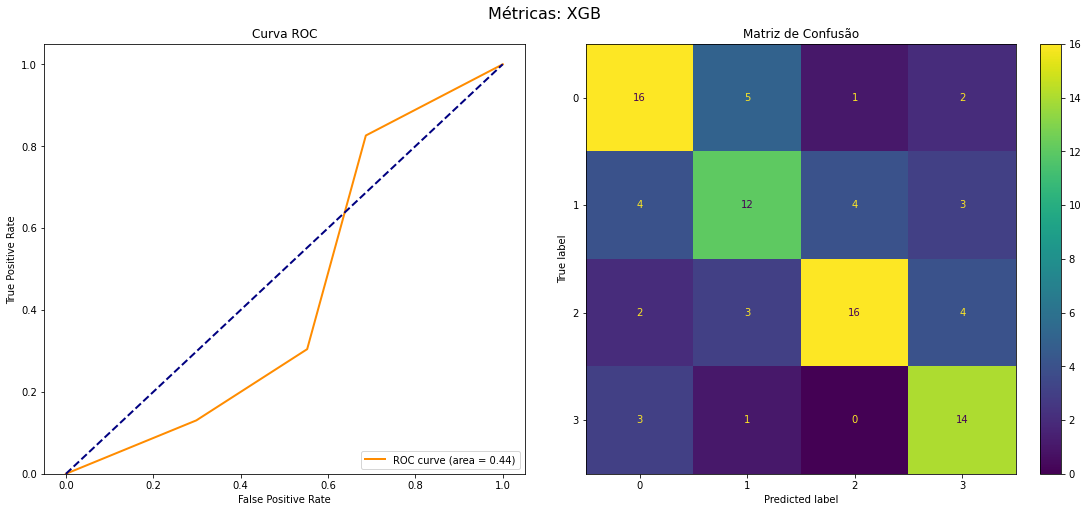

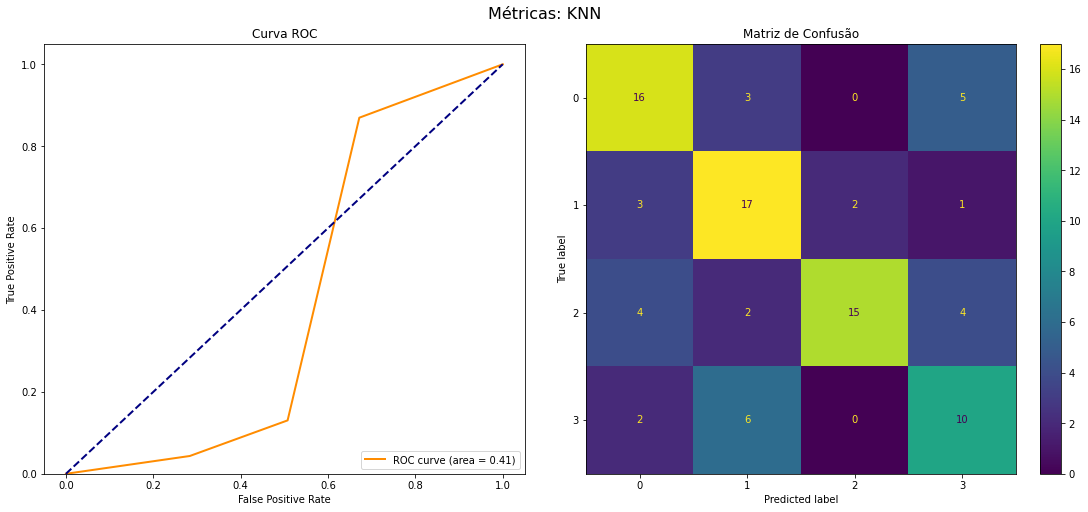

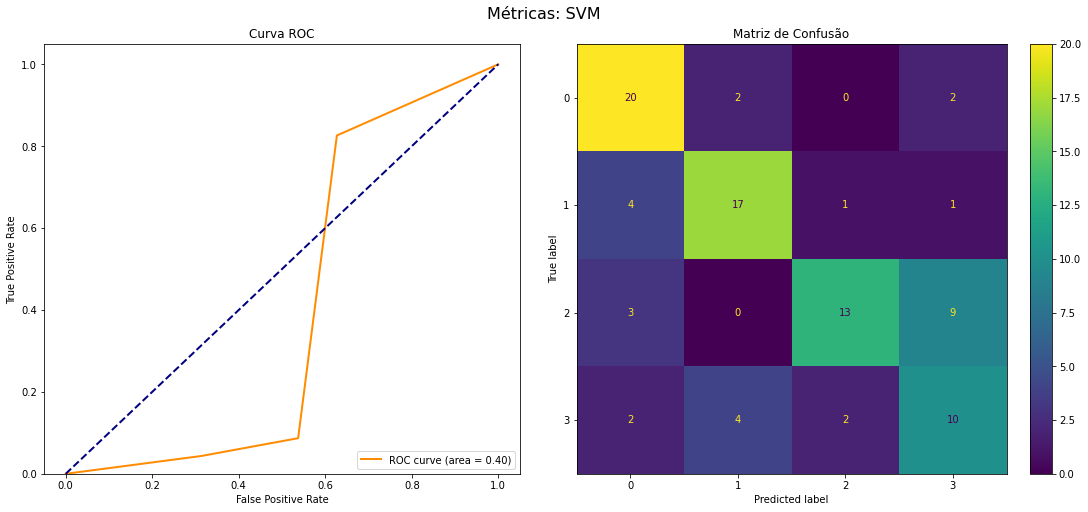

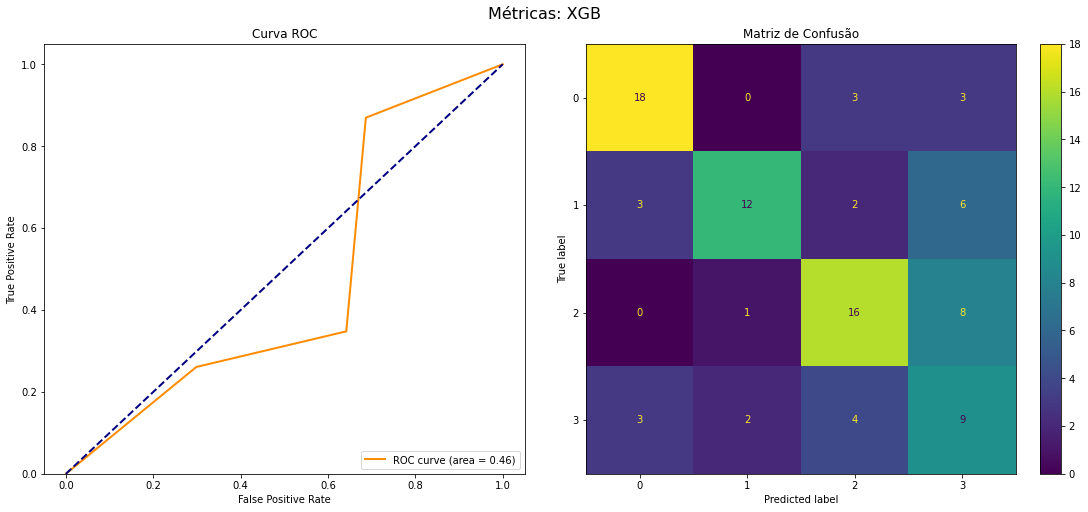

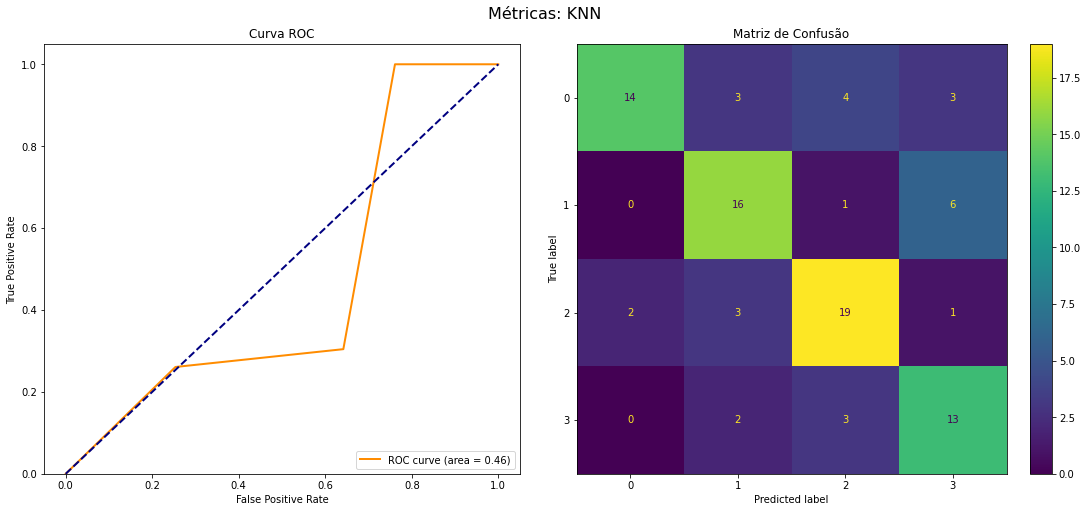

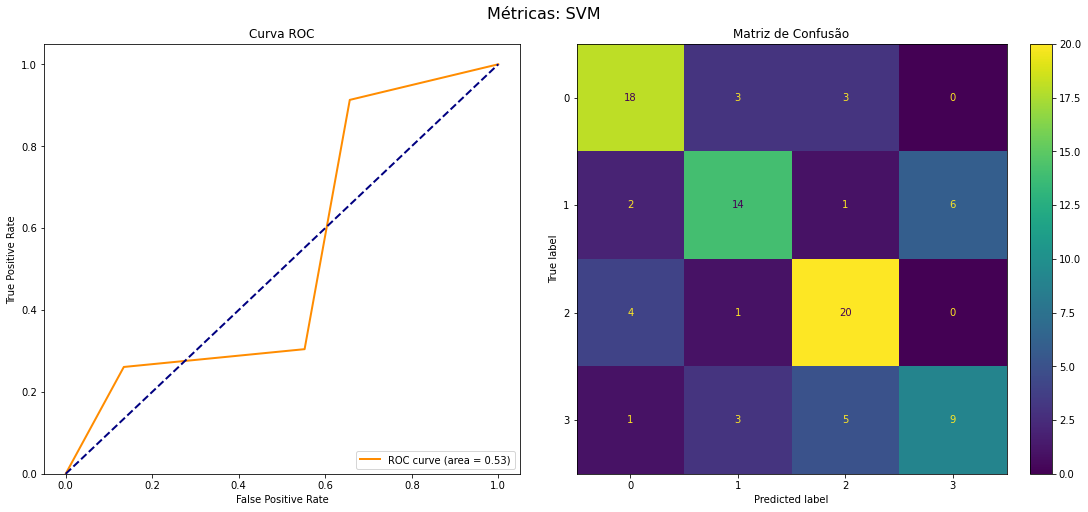

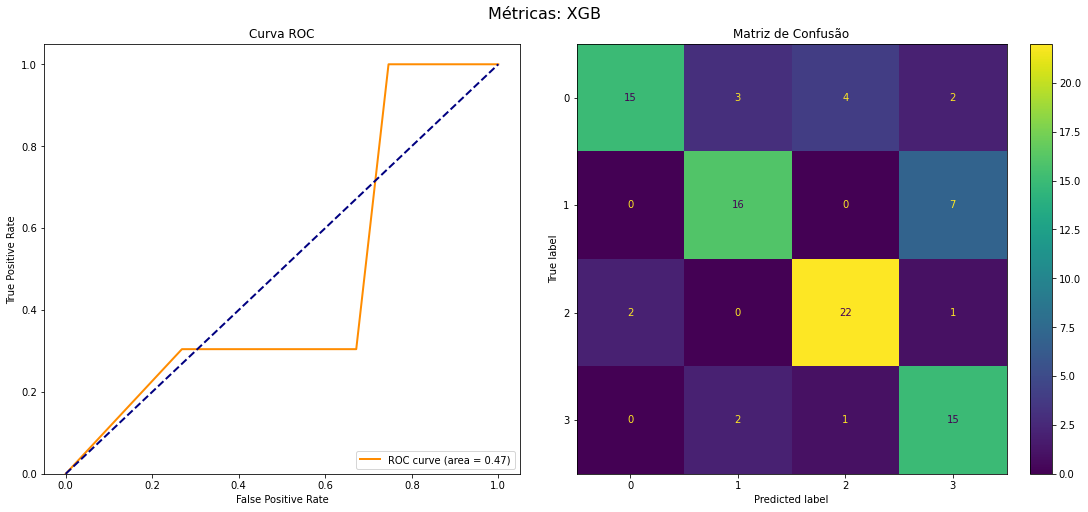

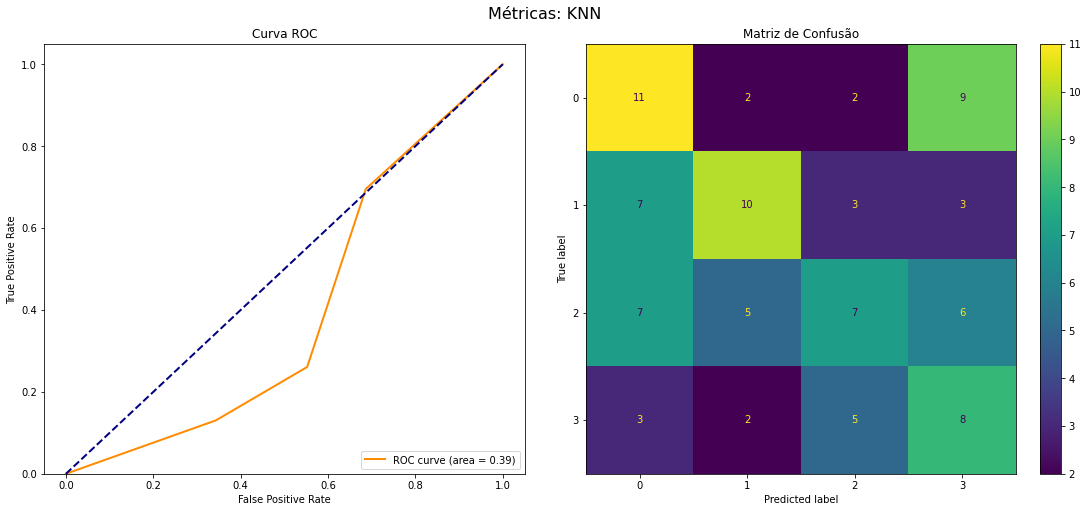

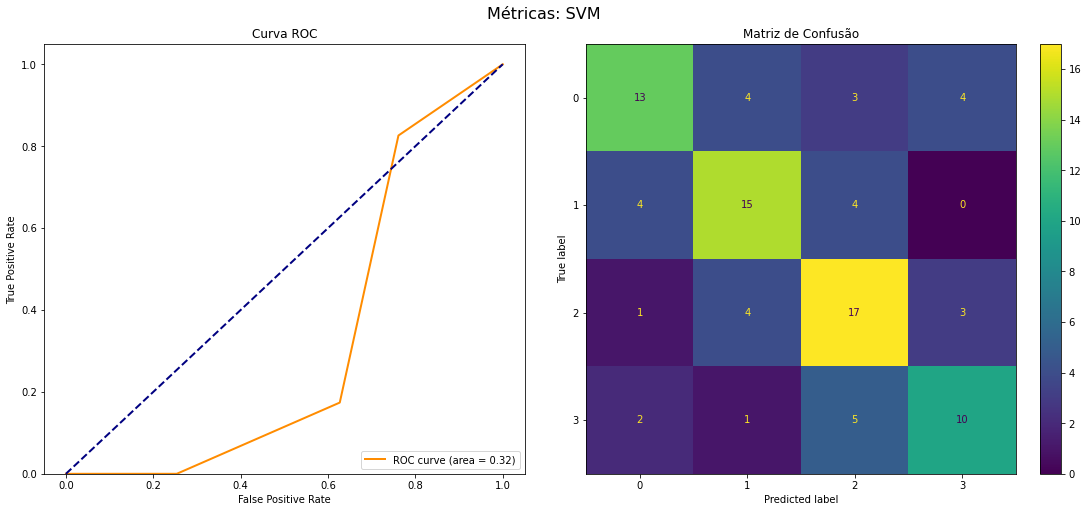

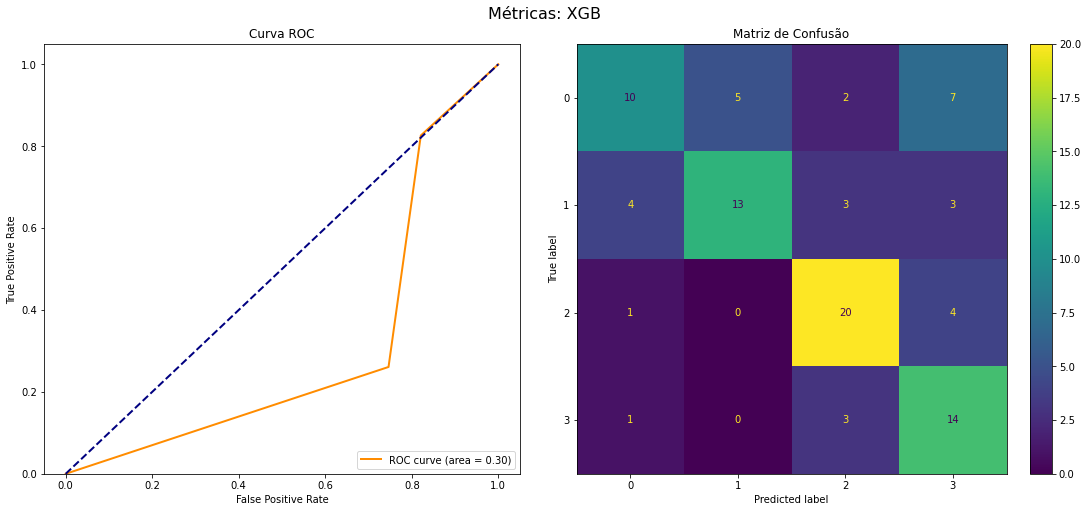

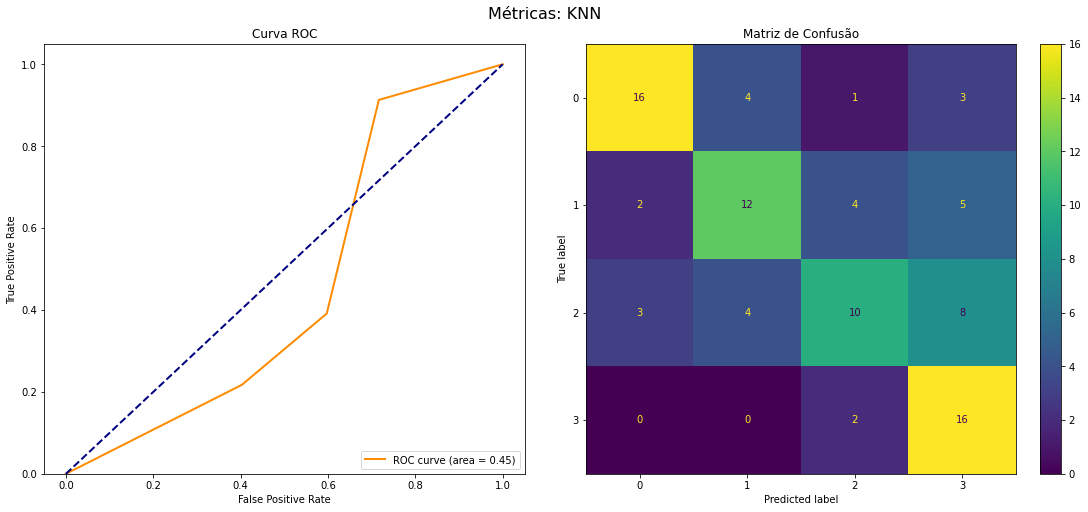

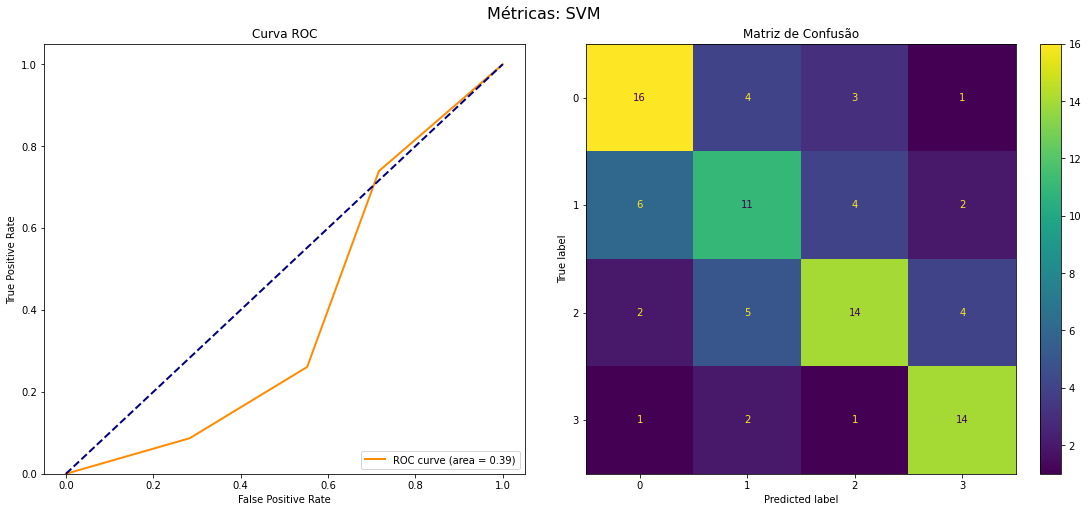

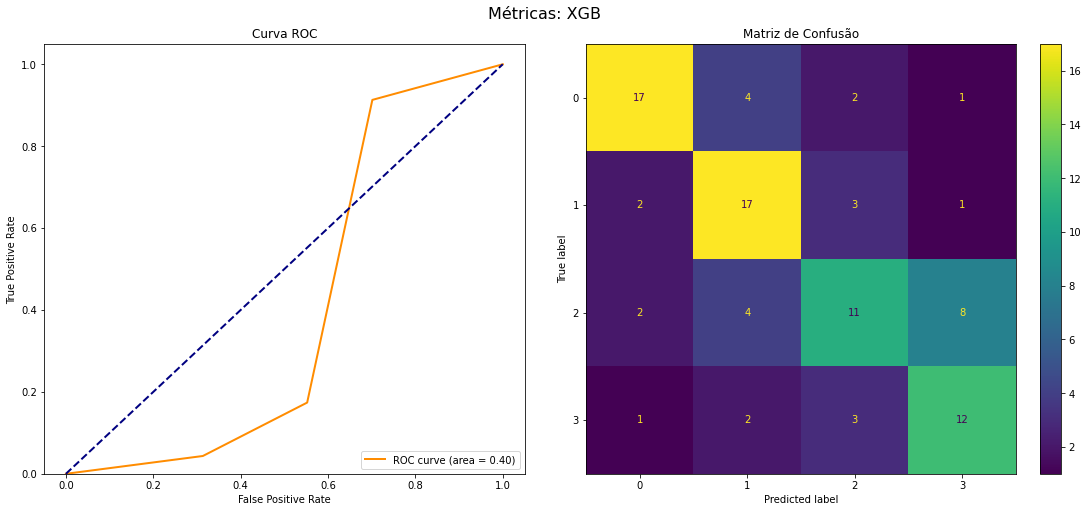

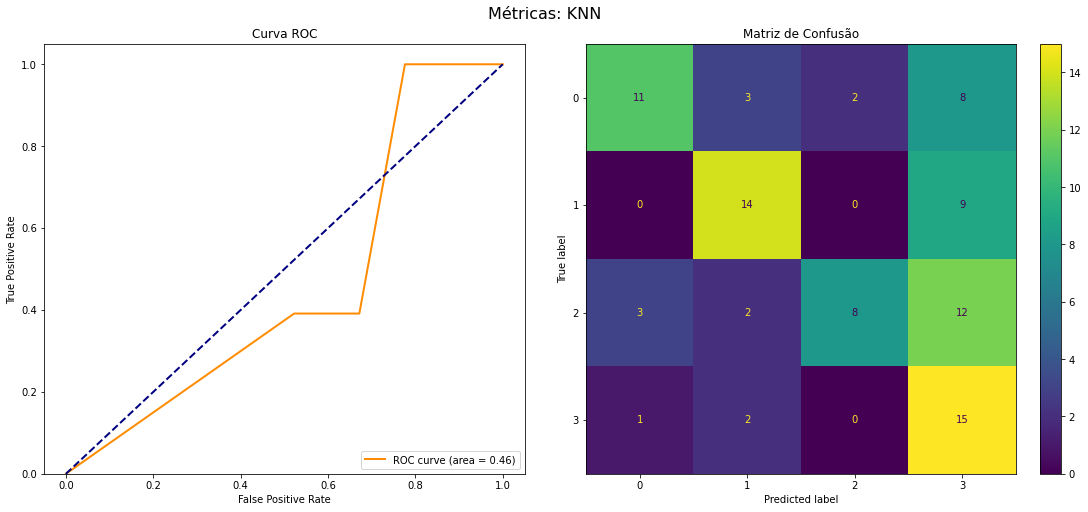

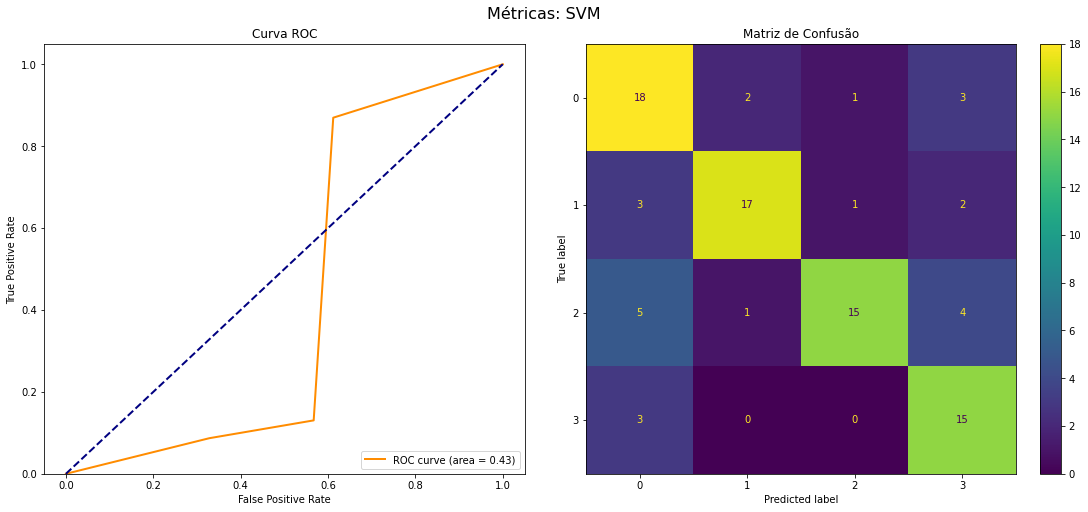

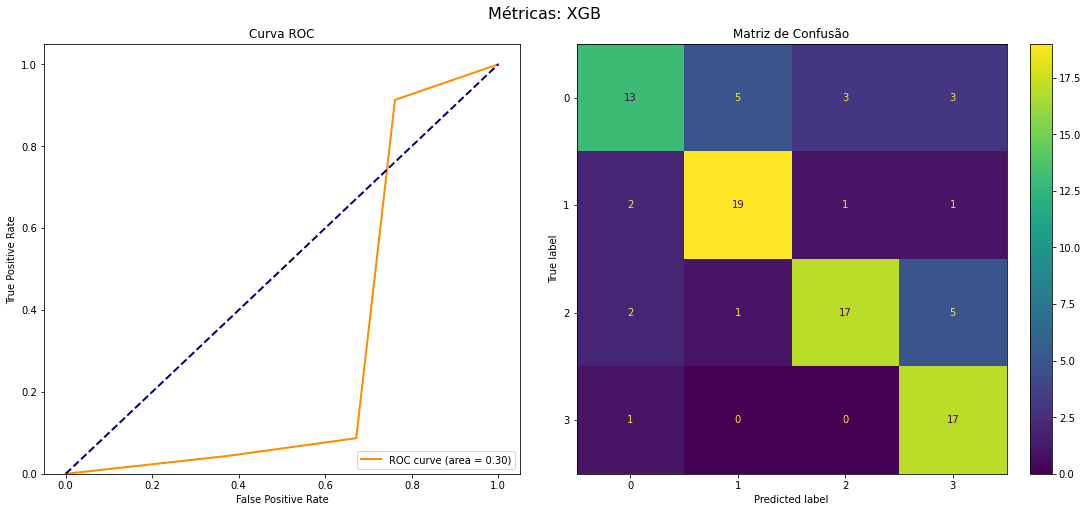

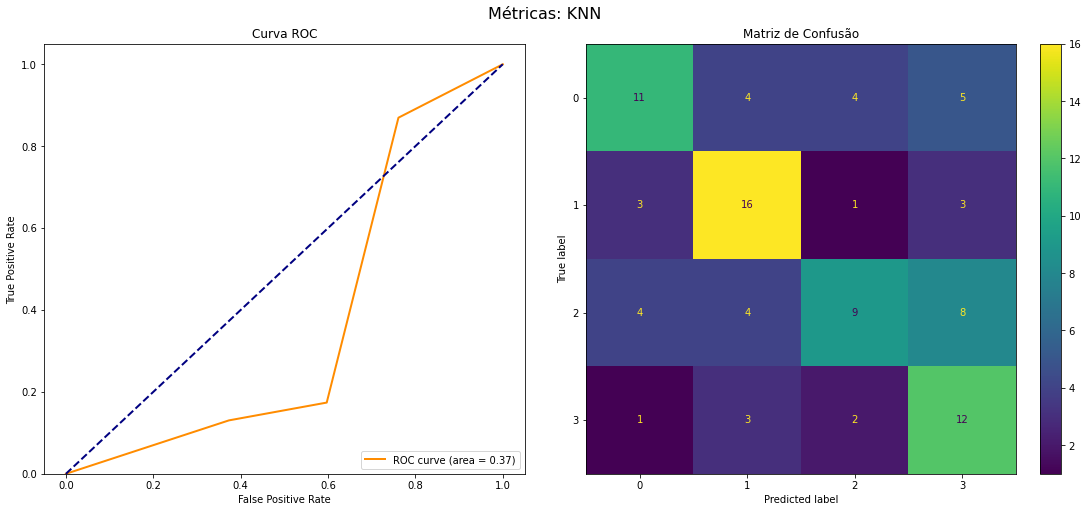

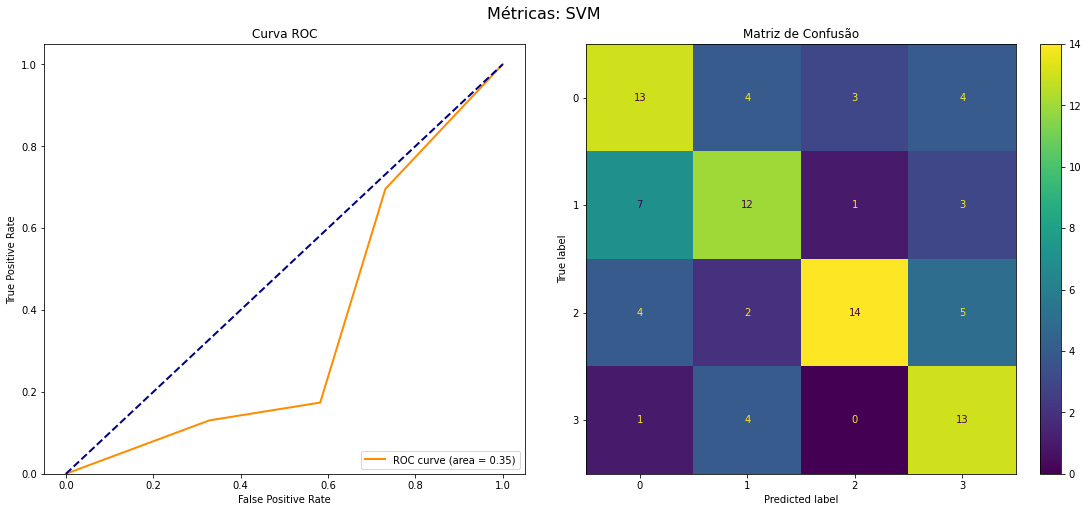

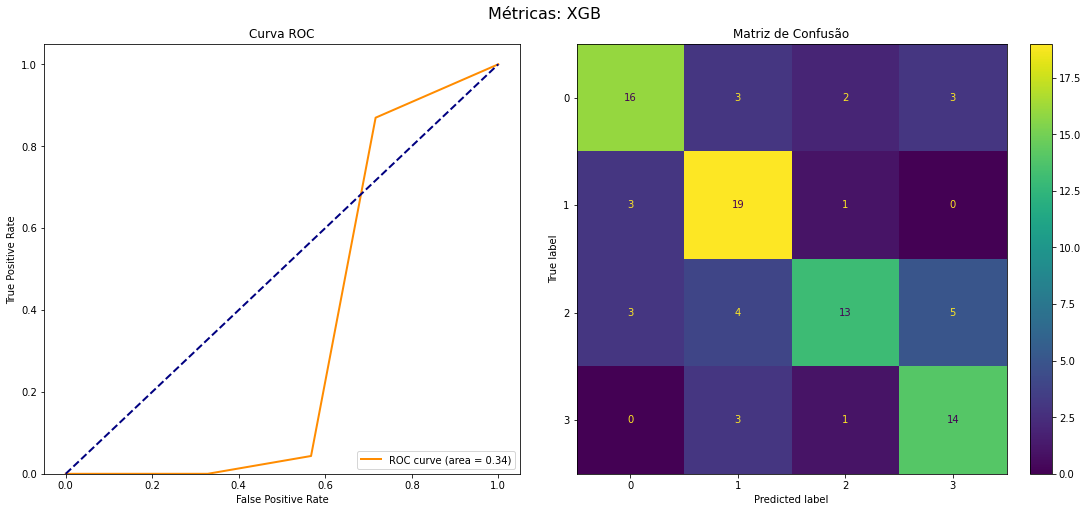

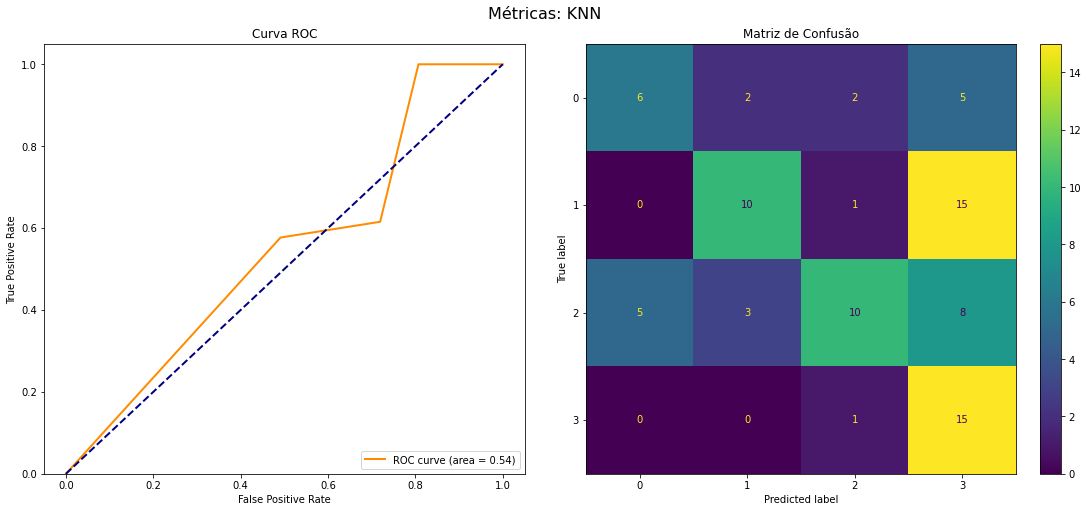

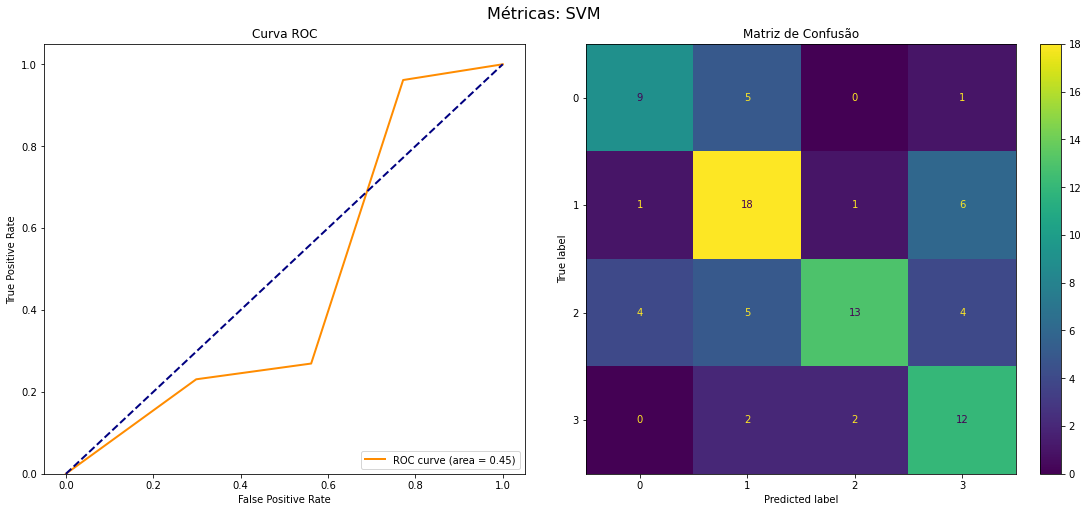

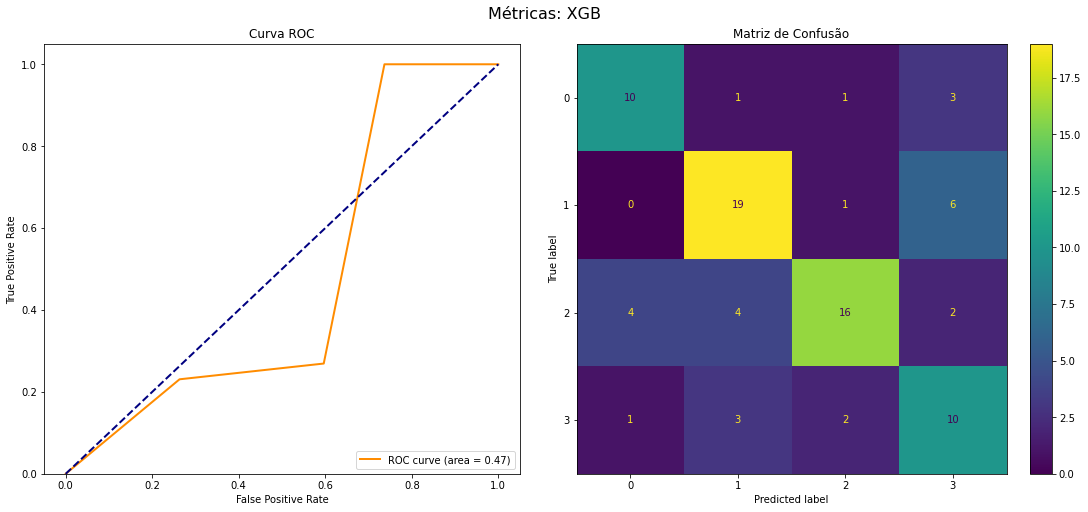

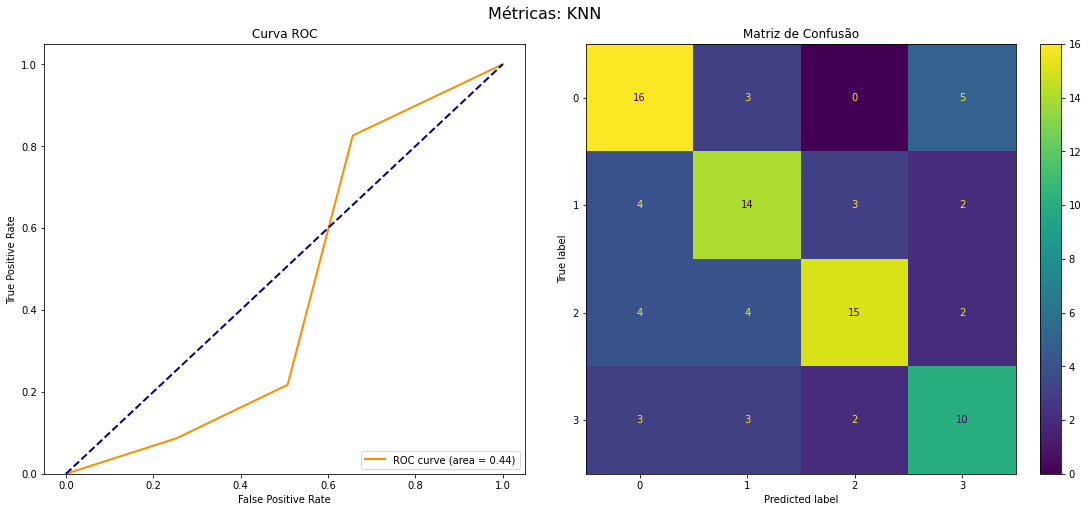

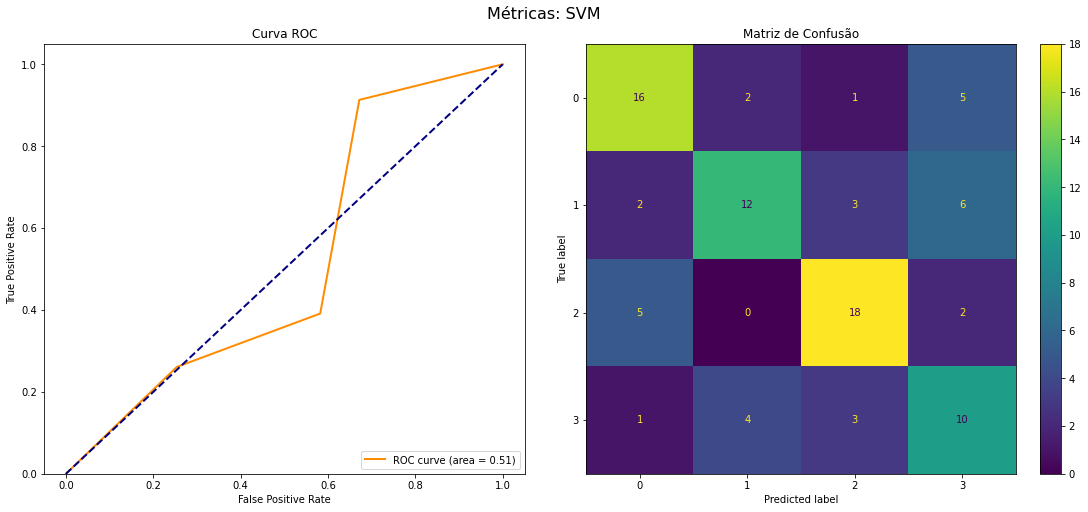

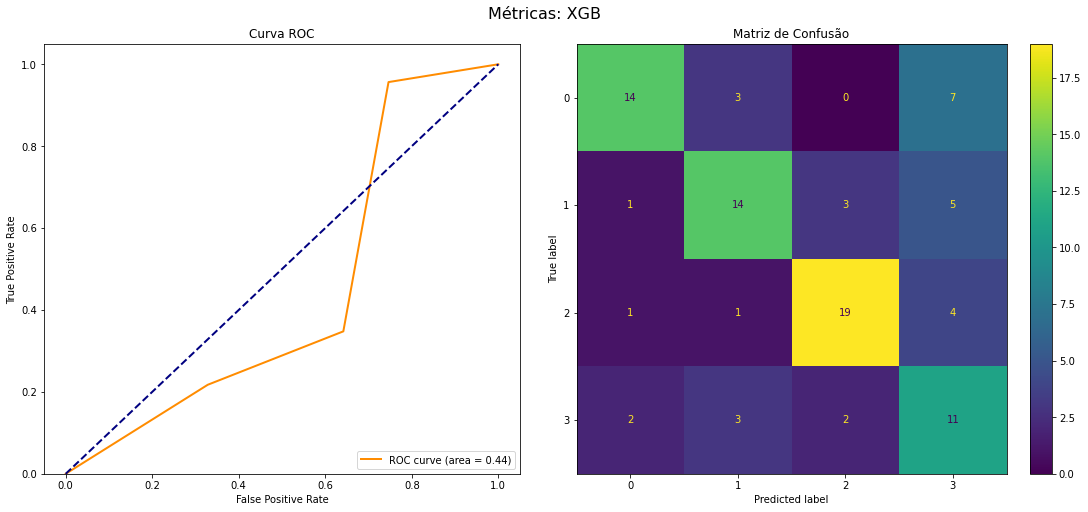

In [11]:
directory = 'C:/Users/Maods/Documents/TCC/data/eeg-motor-movementimagery-dataset/files/'
extension = '**/*.edf'
files = [ file.name for file in Path(directory).glob('**/*') if len(file.name) == 4]
for file in files:
    x_movementimagery, y_movementimagery  = load_eeg_data_edf(directory + file, extension)
    nb_classes = np.unique(y_movementimagery).shape[0]
    if nb_classes != 4 or len(np.shape(x_movementimagery)) < 3:
        continue
    _, channels, samples = np.shape(x_movementimagery)

    binary = len(np.unique(y_movementimagery)) == 2
    run_pipeline(x_movementimagery, y_movementimagery, "eeg-mi", file, metrics_results, fs=160, binary=binary)

In [12]:
result = pd.DataFrame(metrics_results)
result = result.sort_values(['cross_val_score','F1_score'], ascending=False)
result.head(30)

cross_val_score  Accuracy  Precision    Recall  F1_score       auc  \
31            0.844  0.791667   0.799729  0.791667  0.791868  0.796037   
4             0.820  0.770000   0.776023  0.770000  0.769193  0.771309   
30            0.816  0.694444   0.704157  0.694444  0.694444  0.699301   
7             0.800  0.700000   0.700560  0.700000  0.700000  0.700280   
32            0.789  0.722222   0.738657  0.722222  0.721364  0.729604   
79            0.769  0.626506   0.659225  0.626506  0.626097  0.453441   
78            0.768  0.493976   0.598409  0.493976  0.490863  0.541498   
14            0.750  0.680000   0.680544  0.680000  0.680000  0.680272   
77            0.744  0.688889   0.701063  0.688889  0.684217  0.338417   
6             0.730  0.640000   0.640512  0.640000  0.640000  0.640256   
62            0.722  0.611111   0.651453  0.611111  0.620999  0.463660   
22            0.720  0.840000   0.854717  0.840000  0.838712  0.841937   
61            0.711  0.666667   0.689400  0.666667  0.666299  0.402985   
76            0.711  0.577778   0.598110  0.577778  0.579602  0.352693   
23            0.710  0.850000   0.853824  0.850000  0.849775  0.850940   
19            0.710  0.770000   0.772273  0.770000  0.769191  0.768908   
8             0.710  0.680000   0.680000  0.680000  0.680000  0.679872   
80            0.710  0.662651   0.683317  0.662651  0.667194  0.465924   
65            0.700  0.755556   0.776341  0.755556  0.755558  0.465931   
10            0.700  0.730000   0.731154  0.730000  0.729919  0.730492   
71            0.700  0.633333   0.636876  0.633333  0.629768  0.399416   
3             0.690  0.750000   0.769312  0.750000  0.746381  0.752501   
74            0.689  0.733333   0.742452  0.733333  0.727254  0.300779   
53            0.689  0.622222   0.641036  0.622222  0.627084  0.367294   
29            0.688  0.562500   0.582205  0.562500  0.568226  0.443396   
16            0.680  0.770000   0.770200  0.770000  0.770023  0.770108   
21            0.680  0.770000   0.770016  0.770000  0.769931  0.769708   
50            0.678  0.711111   0.749321  0.711111  0.718064  0.416288   
64            0.678  0.677778   0.673941  0.677778  0.673397  0.527579   
68            0.678  0.633333   0.649647  0.633333  0.626776  0.301428   

       kappa  mathew_coef    dataset            subject  \
31  0.585253     0.590928  BCICIV_II               A04T   
4   0.541101     0.546457   BCICIV_I  BCICIV_calib_ds1a   
30  0.393103     0.398601  BCICIV_II               A04T   
7   0.400240     0.400560   BCICIV_I  BCICIV_calib_ds1b   
32  0.450801     0.462089  BCICIV_II               A04T   
79  0.496970     0.505173     eeg-mi               S041   
78  0.340023     0.376611     eeg-mi               S041   
14  0.360256     0.360544   BCICIV_I  BCICIV_calib_ds1d   
77  0.585799     0.591637     eeg-mi               S038   
6   0.280288     0.280512   BCICIV_I  BCICIV_calib_ds1b   
62  0.482419     0.487550     eeg-mi               S022   
22  0.681148     0.695090   BCICIV_I  BCICIV_calib_ds1g   
61  0.555848     0.561488     eeg-mi               S022   
76  0.438792     0.442422     eeg-mi               S038   
23  0.700479     0.703997   BCICIV_I  BCICIV_calib_ds1g   
19  0.538893     0.541621   BCICIV_I  BCICIV_calib_ds1f   
8   0.359744     0.359744   BCICIV_I  BCICIV_calib_ds1b   
80  0.544849     0.548181     eeg-mi               S041   
65  0.674556     0.680486     eeg-mi               S027   
10  0.460432     0.461261   BCICIV_I  BCICIV_calib_ds1c   
71  0.511513     0.514560     eeg-mi               S035   
3   0.502389     0.520102   BCICIV_I  BCICIV_calib_ds1a   
74  0.645902     0.652318     eeg-mi               S037   
53  0.496959     0.499340     eeg-mi               S009   
29  0.416779     0.418584  BCICIV_II               A02T   
16  0.540000     0.540108   BCICIV_I  BCICIV_calib_ds1e   
21  0.539632     0.539740   BCICIV_I  BCICIV_calib_ds1g   
50  0.617334     0.625831     eeg-mi               S004  

In [13]:
result.to_csv('./artifacts/ml_models2_results.csv', index=False, header=True)